# Module Title:	Machine Learning (10 ETCS)
### Assessment Title: Machine Learning Project
### Lecturer Name: Dr. Muhammad Iqba 
### Student Full Name & Number:	Arthur Claudino Gomes de Assis 2023146| Heitor Gomes de Araújo Filho 2023098 | Natalia de Oliveira Rodrigues 2023112 

# Table of Contents

1. Introduction
2. Business Understanding
    <br> 2.1 Business Objective
    <br> 2.2 Assess Situation
    <br> 2.2 Assess Situation
    <br> 2.3 Data Mining
    <br> 2.4 Project Plan
    <br> 2.5 Project Question
3. Data Understanding
    <br> 3.1 Data Exploration
    <br> 3.2 Data Visualization
4. Data Preparation
5. Modeling & Evaluation
    <br> 5.1 Pre-processing the data
    <br> 5.2 Randon Forest Regressor Model
    <br> 5.3 KNeighbors Regressor Model
    <br> 5.4 Plotting Graphs for analysis
    <br> 5.5 Train-Test Split (10%) and Modeling
    <br>5.6 Random Forest Regressor Model for 10% Split
    <br>5.7 KNeighbors Regressor for 10% Split
    <br>5.8 Plotting graphs for analysis - 10% Split
    <br>5.9 Train-Test Split (30%) and Modeling
    <br>5.10 Random Forest Regressor for 30% Split
    <br>5.11 KNeighbors Regressor for 30% Split
    <br>5.12 Plotting graphs of results for all tests executed
6. Conclusion
7. References List
8. Appendix
    <br> Appendix I: Data Dictionary
    <br> Appendix II: Renamed Columns
    <br> Appendix III: Other correlations among variables
    <br> Appendix VI: Machine Learning Tests
    <br> Appendix V: Machine Learning Graphs

# 1. Introduction

The idea that energy is the driver of growth in the twenty-first century is confirmed by the global surge in energy consumption. Population growth is another factor supporting the high demand for energy and services associated with it, in addition to urbanization. The majority of the energy used to support economic growth that threatens environmental sustainability through CO2 emissions comes from fossil fuels.

A worldwide energy crisis has emerged with environmental concerns in the present conflicts, endangering access to electricity, particularly for people with lower incomes. World Energy Outlook (2022) states that "...the combination of the COVID pandemic and the current energy crisis means that 70 million people who recently gained access to electricity will likely lose the ability to afford that access - and 100 million people may no longer be able to cook with clean fuels, returning to unhealthy and unsafe means of cooking."

# 2. Business Understanding

  ### 2.1 Business Objective

Develop an energy generation predictive model by using several machine learning methods, hyperparameters, and cross-validation to juistify the authenticity of the ML results.

### 2.2 Assess Situation

Population increase has led to a situation where developing sustainable energy sources is both a big financial opportunity and a noble contribution to a safer and cleaner electricity infrastructure.

Photovoltaic Energy (PV) is one of the most significant and widely used clean energy technologies at the moment. PV is created by PV boards that harness solar energy to produce power. Despite being easily accessible, one of its biggest problems is that it might be unstable depending on the weather.

### 2.3 Data Mining 

After analysing the dataset, this report will split the Data, Fit Data Preparation on Training Dataset, apply Data Preparation to Train and Test Datasets explore models and apply cross-validation to create forecasts capable to estimate power generation expected based in weather conditions.

### 2.4 Project Plan

The goal is to create and implement ML models in the field of energy and the environment. The fundamental concept is to use cross-validation and hyperparameters to apply multiple ML. 
The next step is to select the ideal ML approach values. On the basis of the preferred explanation, a logical defense is also offered.

### 2.5 Project Question
Based on the information provided, the problem question of our project is: which regression approach will be used to predict "Generation_Power_kw" as a target varialble?
 

# 3. Data Understanding

### 3.1 Data Exploration

The dataset spg.csv can be found on Kaggle, an authentic resource repository, and has 4213 observations and 21 attributes. 
The Generation_Power_kw attribute, renamed afterwards as Power, is the target variable.
The attributes data type are Numerical data: float64(17), and int64(4). The data dictionary can be found on Appendix I. 

In [1]:
# Importing required libraries.
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import asarray
import statistics as stats
from scipy.stats import zscore
from scipy.stats import skew
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Preprocessing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# ML Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# loading the data into dataframe.
df = pd.read_csv('spg.csv')

A clear visualization of the renamed columns can be bound on Appendix II.

In [3]:
df = df.rename(columns={"temperature_2_m_above_gnd": "temp", "relative_humidity_2_m_above_gnd": "humid", 
                        "mean_sea_level_pressure_MSL":"sea_level","total_precipitation_sfc":"precip",
                        "snowfall_amount_sfc":"snowf","total_cloud_cover_sfc":"t_cloud","high_cloud_cover_high_cld_lay":"h_cloud",
                        "medium_cloud_cover_mid_cld_lay":"m_cloud","low_cloud_cover_low_cld_lay":"l_cloud","shortwave_radiation_backwards_sfc":"radiat",
                        "wind_speed_10_m_above_gnd":"w_speed10","wind_direction_10_m_above_gnd":"w_direc10","wind_speed_80_m_above_gnd":"w_speed80",
                        "wind_direction_80_m_above_gnd":"w_direc80","wind_speed_900_mb":"w_speed900","wind_direction_900_mb":"w_direc900",
                        "wind_gust_10_m_above_gnd":"w_gust","angle_of_incidence":"angle_inc","generated_power_kw":"power"})

In [4]:
df.head()

temp  humid  sea_level  precip  snowf  t_cloud  h_cloud  m_cloud  l_cloud  \
0  2.17     31     1035.0     0.0    0.0      0.0        0        0        0   
1  2.31     27     1035.1     0.0    0.0      0.0        0        0        0   
2  3.65     33     1035.4     0.0    0.0      0.0        0        0        0   
3  5.82     30     1035.4     0.0    0.0      0.0        0        0        0   
4  7.73     27     1034.4     0.0    0.0      0.0        0        0        0   

   radiat  ...  w_direc10  w_speed80  w_direc80  w_speed900  w_direc900  \
0    0.00  ...     312.71       9.36      22.62        6.62      337.62   
1    1.78  ...     294.78       5.99      32.74        4.61      321.34   
2  108.58  ...     270.00       3.89      56.31        3.76      286.70   
3  258.10  ...     323.13       3.55      23.96        3.08      339.44   
4  375.58  ...      10.01       6.76      25.20        6.62       22.38   

   w_gust  angle_inc     zenith    azimuth       power  
0   24.48  58.753108  83.237322  128.33543   454.10095  
1   21.96  45.408585  75.143041  139.65530  1411.99940  
2   14.04  32.848282  68.820648  152.53769  2214.84930  
3   19.80  22.699288  64.883536  166.90159  2527.60920  
4   16.56  19.199908  63.795208  182.13526  2640.20340  

[5 rows x 21 columns]

In [5]:
df.shape
print('The dataset original shape: ', df.shape) 

The dataset original shape:  (4213, 21)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        4213 non-null   float64
 1   humid       4213 non-null   int64  
 2   sea_level   4213 non-null   float64
 3   precip      4213 non-null   float64
 4   snowf       4213 non-null   float64
 5   t_cloud     4213 non-null   float64
 6   h_cloud     4213 non-null   int64  
 7   m_cloud     4213 non-null   int64  
 8   l_cloud     4213 non-null   int64  
 9   radiat      4213 non-null   float64
 10  w_speed10   4213 non-null   float64
 11  w_direc10   4213 non-null   float64
 12  w_speed80   4213 non-null   float64
 13  w_direc80   4213 non-null   float64
 14  w_speed900  4213 non-null   float64
 15  w_direc900  4213 non-null   float64
 16  w_gust      4213 non-null   float64
 17  angle_inc   4213 non-null   float64
 18  zenith      4213 non-null   float64
 19  azimuth     4213 non-null  

In the table below, we can see the statistical measurements of the dataset. It helps us to check if the spg.csv dataset needs to be normalized, and also helps us to identify the presence of outliers. 

In [7]:
df.describe()

temp        humid    sea_level       precip        snowf  \
count  4213.000000  4213.000000  4213.000000  4213.000000  4213.000000   
mean     15.068111    51.361025  1019.337812     0.031759     0.002808   
std       8.853677    23.525864     7.022867     0.170212     0.038015   
min      -5.350000     7.000000   997.500000     0.000000     0.000000   
25%       8.390000    32.000000  1014.500000     0.000000     0.000000   
50%      14.750000    48.000000  1018.100000     0.000000     0.000000   
75%      21.290000    70.000000  1023.600000     0.000000     0.000000   
max      34.900000   100.000000  1046.800000     3.200000     1.680000   

           t_cloud      h_cloud      m_cloud      l_cloud       radiat  ...  \
count  4213.000000  4213.000000  4213.000000  4213.000000  4213.000000  ...   
mean     34.056990    14.458818    20.023499    21.373368   387.759036  ...   
std      42.843638    30.711707    36.387948    38.013885   278.459293  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000   142.400000  ...   
50%       8.700000     0.000000     0.000000     0.000000   381.810000  ...   
75%     100.000000     9.000000    10.000000    10.000000   599.860000  ...   
max     100.000000   100.000000   100.000000   100.000000   952.300000  ...   

         w_direc10    w_speed80    w_direc80  w_speed900   w_direc900  \
count  4213.000000  4213.000000  4213.000000  4213.00000  4213.000000   
mean    195.078452    18.978483   191.166862    16.36319   192.447911   
std     106.626782    11.999960   108.760021     9.88533   106.516195   
min       0.540000     0.000000     1.120000     0.00000     1.120000   
25%     153.190000    10.140000   130.240000     9.18000   148.220000   
50%     191.770000    16.240000   187.770000    14.49000   187.990000   
75%     292.070000    26.140000   292.040000    21.97000   288.000000   
max     360.000000    66.880000   360.000000    61.11000   360.000000   

            w_gust    angle_inc       zenith      azimuth        power  
count  4213.000000  4213.000000  4213.000000  4213.000000  4213.000000  
mean     20.583489    50.837490    59.980947   169.167651  1134.347313  
std      12.648899    26.638965    19.857711    64.568385   937.957247  
min       0.720000     3.755323    17.727761    54.379093     0.000595  
25%      11.160000    29.408181    45.291631   114.136600   231.700450  
50%      18.000000    47.335557    62.142611   163.241650   971.642650  
75%      27.000000    69.197492    74.346737   225.085620  2020.966700  
max      84.960000   121.635920   128.415370   289.045180  3056.794100  

[8 rows x 21 columns]

## 3.2 Data Visualization

### 3.2.1 Correlation among variables

The attributes have a strong correlation, as we can see below, 9 attributes have a positive correlation > 0.9, and 3 attributes have a negative correlation > 0.7. The relevant correlations can be visualized below. 

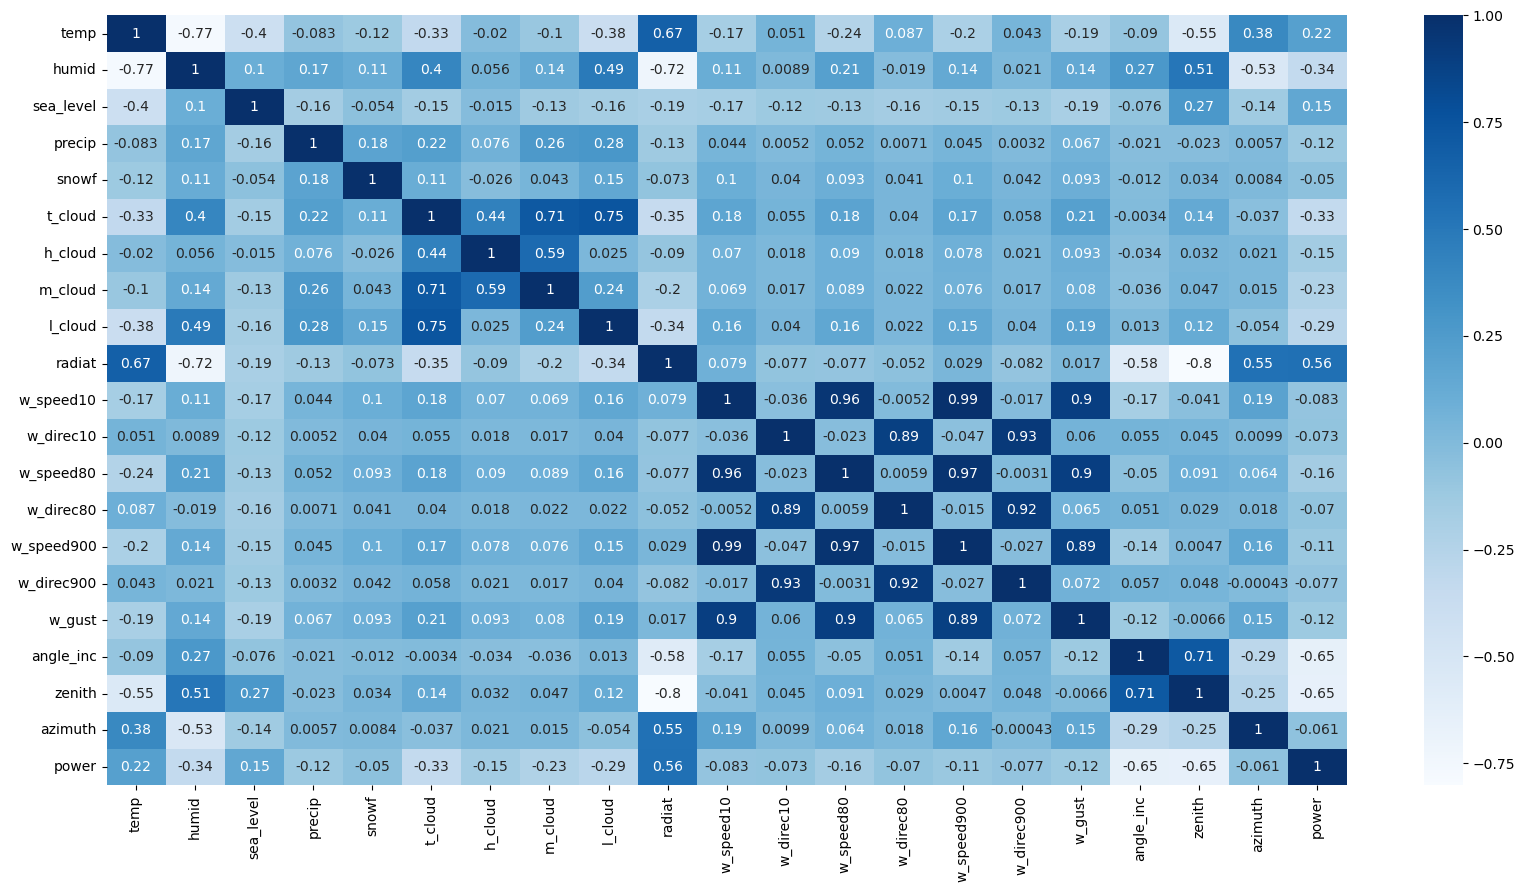

In [8]:
plt.figure(figsize=(20,10))
corr_table = df.corr()
sns.heatmap(corr_table ,cmap="Blues",annot=True);

The most relevant correlations among variables and target variable:

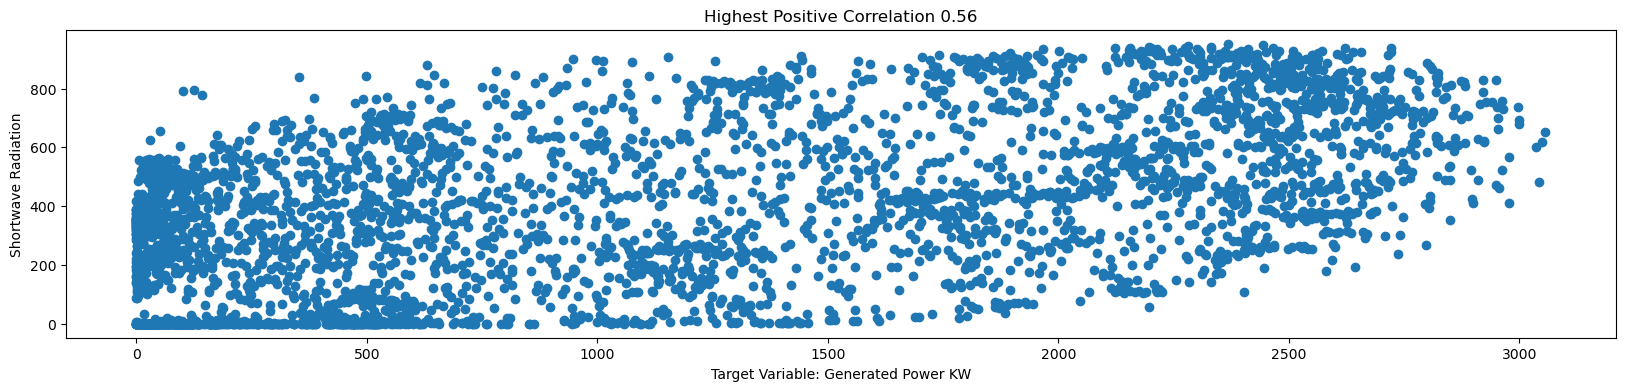

In [9]:
fig, ax = plt.subplots(figsize=(20,4))
ax.scatter(df["power"], df["radiat"])
ax.set_title("Highest Positive Correlation 0.56")
ax.set_xlabel("Target Variable: Generated Power KW")
ax.set_ylabel("Shortwave Radiation")
plt.show()

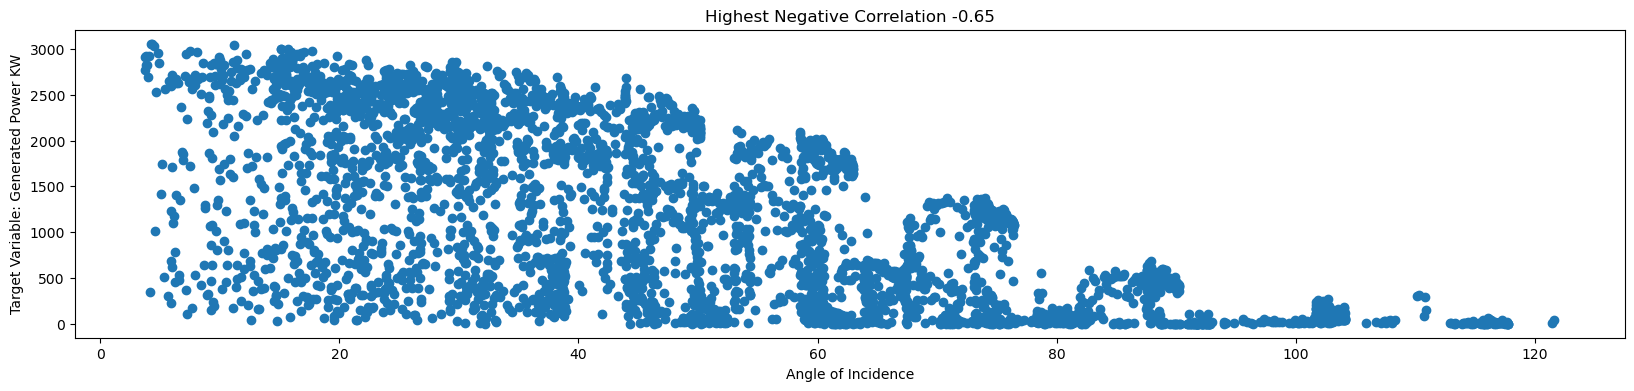

In [10]:
 fig, ax = plt.subplots(figsize=(20,4))
ax.scatter(df["angle_inc"], df["power"])
ax.set_title("Highest Negative Correlation -0.65")
ax.set_ylabel("Target Variable: Generated Power KW")
ax.set_xlabel("Angle of Incidence")
plt.show()

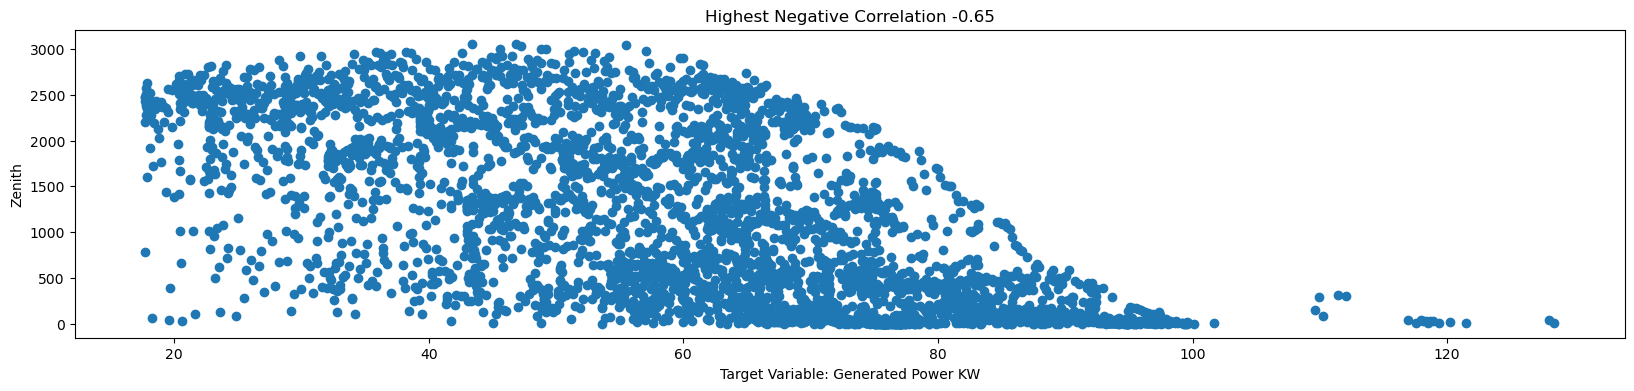

In [11]:
fig, ax = plt.subplots(figsize=(20,4))
ax.scatter(df["zenith"], df["power"])
ax.set_title("Highest Negative Correlation -0.65")
ax.set_xlabel("Target Variable: Generated Power KW")
ax.set_ylabel("Zenith")
plt.show()

The most relevant correlations (> 0.9) among independentvariables.

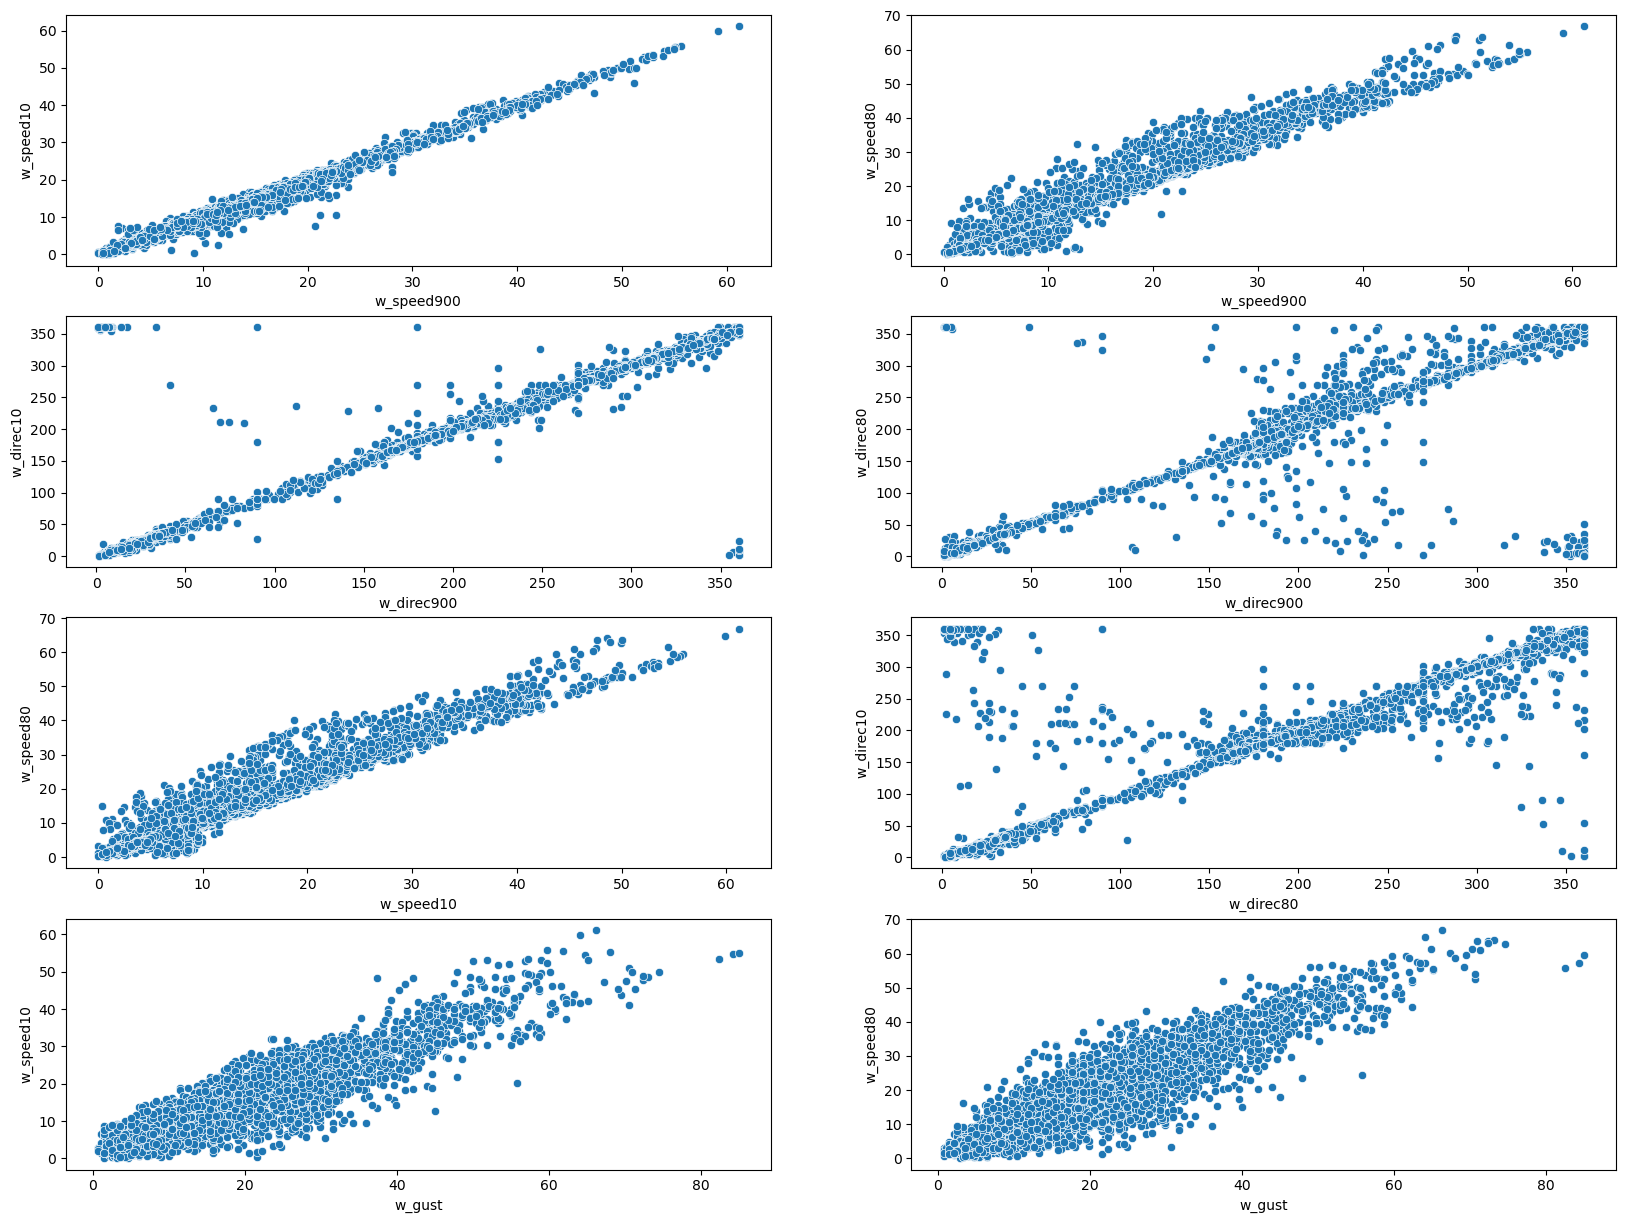

In [12]:
plt.figure(figsize = (20,15))
plt.subplot(4,2,1)
sns.scatterplot(x = "w_speed900", y="w_speed10",data=df)
plt.subplot(4,2,2)
sns.scatterplot(x = 'w_speed900', y='w_speed80',data=df)
plt.subplot(4,2,3)
sns.scatterplot(x = 'w_direc900', y='w_direc10',data=df)
plt.subplot(4,2,4)
sns.scatterplot(x = 'w_direc900', y='w_direc80',data=df)
plt.subplot(4,2,5)
sns.scatterplot(x = 'w_speed10', y='w_speed80',data=df)
plt.subplot(4,2,6)
sns.scatterplot(x = 'w_direc80', y='w_direc10',data=df)
plt.subplot(4,2,7)
sns.scatterplot(x = 'w_gust', y='w_speed10',data=df)
plt.subplot(4,2,8)
sns.scatterplot(x = 'w_gust', y='w_speed80',data=df);

### 3.2.2 Distribution and Outliers 

The skewness will help us to understand how much the distribution of our data deviates from a normal distribution. As we can observe, 7 attributes have skew values > 1.0.

In [13]:
df_skew = df.skew(axis=0) 
df_skew.sort_values(ascending=False) 

snowf         26.278299
precip         8.630336
h_cloud        2.143289
m_cloud        1.537975
l_cloud        1.449282
w_gust         1.111227
w_speed10      1.017751
w_speed900     0.990214
w_speed80      0.931519
t_cloud        0.739499
sea_level      0.517280
angle_inc      0.480446
power          0.324025
humid          0.296871
radiat         0.172694
temp           0.145986
azimuth        0.081150
zenith        -0.111279
w_direc80     -0.240414
w_direc900    -0.265769
w_direc10     -0.300773
dtype: float64

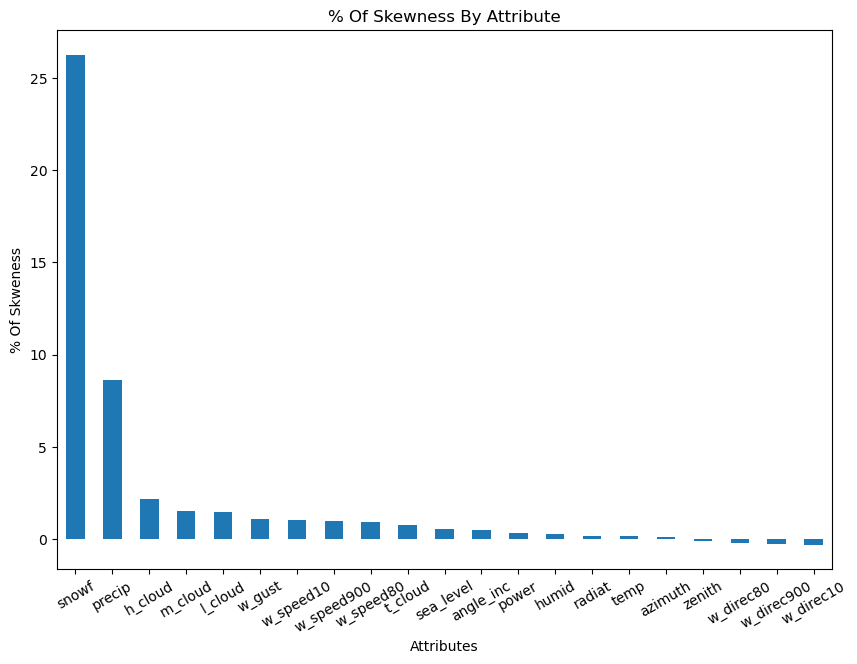

In [14]:
df_skew.sort_values(ascending=False).plot(kind="bar",  figsize=(10,7))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("% Of Skewness By Attribute")
plt.ylabel("% Of Skweness")
plt.xlabel("Attributes");

The strong presence of outliers can be noted in the attributes with skewness > 0.5%. Except for t_cloud and angle_inc attributes. 
<br>The visualization below is following the same order of the skewness graph above.

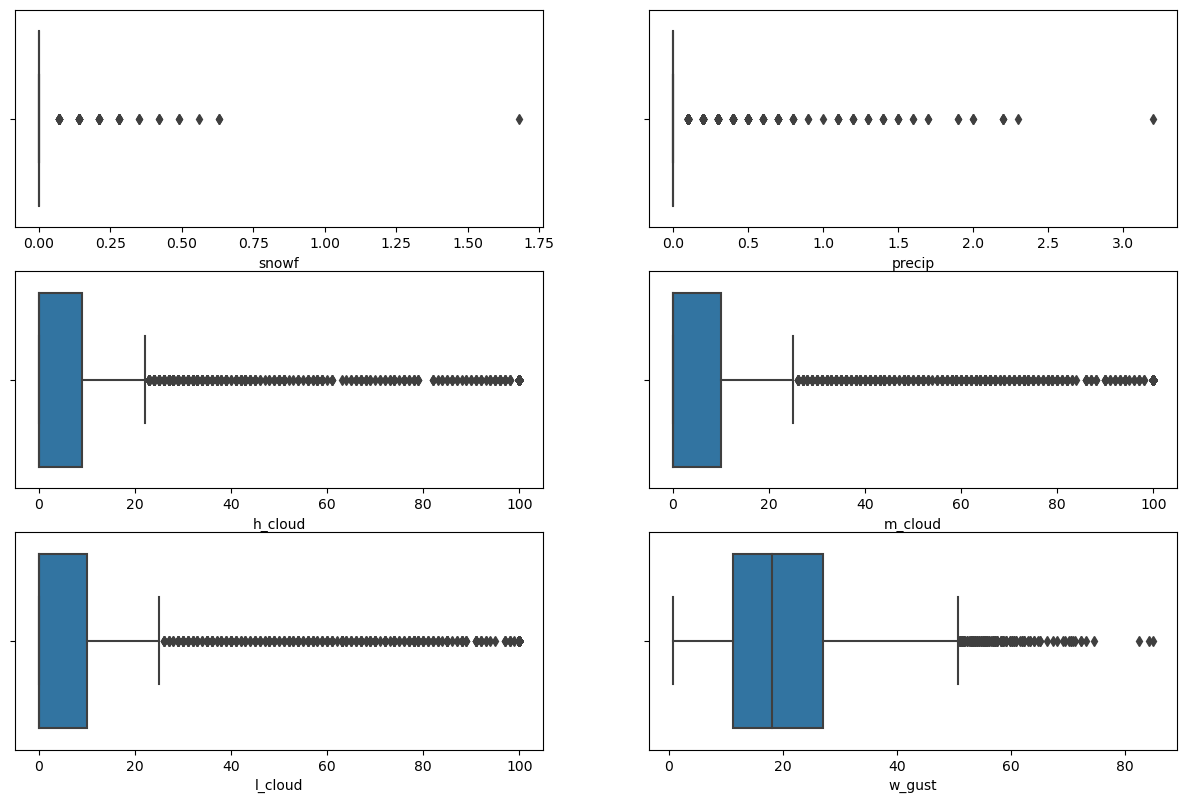

In [15]:
plt.figure(figsize = (15,13))
plt.subplot(4,2,1)
sns.boxplot(x = 'snowf',data=df)
plt.subplot(4,2,2)
sns.boxplot(x = 'precip',data=df)
plt.subplot(4,2,3)
sns.boxplot(x = 'h_cloud',data=df)
plt.subplot(4,2,4)
sns.boxplot(x = 'm_cloud',data=df)
plt.subplot(4,2,5)
sns.boxplot(x = 'l_cloud',data=df)
plt.subplot(4,2,6)
sns.boxplot(x = 'w_gust',data=df);

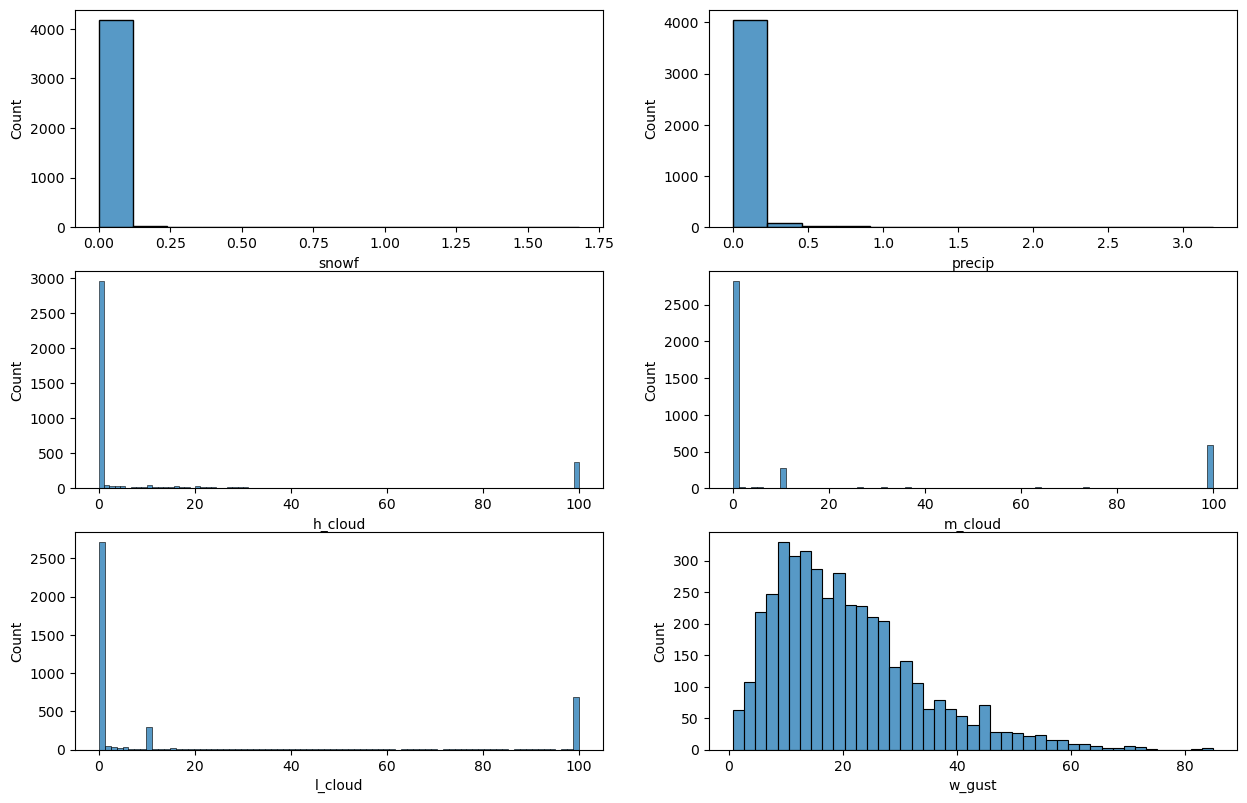

In [16]:
plt.figure(figsize = (15,13))
plt.subplot(4,2,1)
sns.histplot(data=df, x='snowf')
plt.subplot(4,2,2)
sns.histplot(data=df, x='precip')
plt.subplot(4,2,3)
sns.histplot(data=df, x='h_cloud')
plt.subplot(4,2,4)
sns.histplot(data=df, x='m_cloud')
plt.subplot(4,2,5)
sns.histplot(data=df, x='l_cloud')
plt.subplot(4,2,6)
sns.histplot(data=df, x='w_gust');

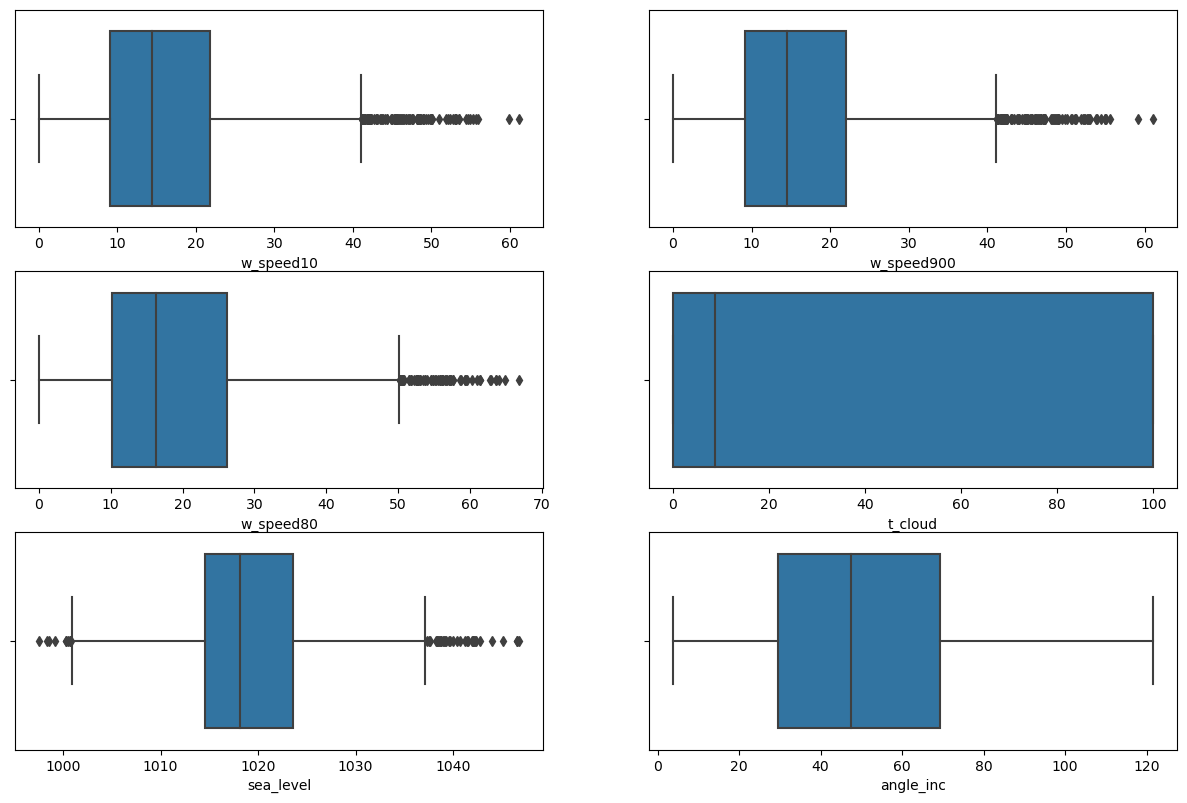

In [17]:
plt.figure(figsize = (15,13))
plt.subplot(4,2,1)
sns.boxplot(x = 'w_speed10',data=df)
plt.subplot(4,2,2)
sns.boxplot(x = 'w_speed900',data=df)
plt.subplot(4,2,3)
sns.boxplot(x = 'w_speed80',data=df)
plt.subplot(4,2,4)
sns.boxplot(x = 't_cloud',data=df)
plt.subplot(4,2,5)
sns.boxplot(x = 'sea_level',data=df)
plt.subplot(4,2,6)
sns.boxplot(x = 'angle_inc',data=df);

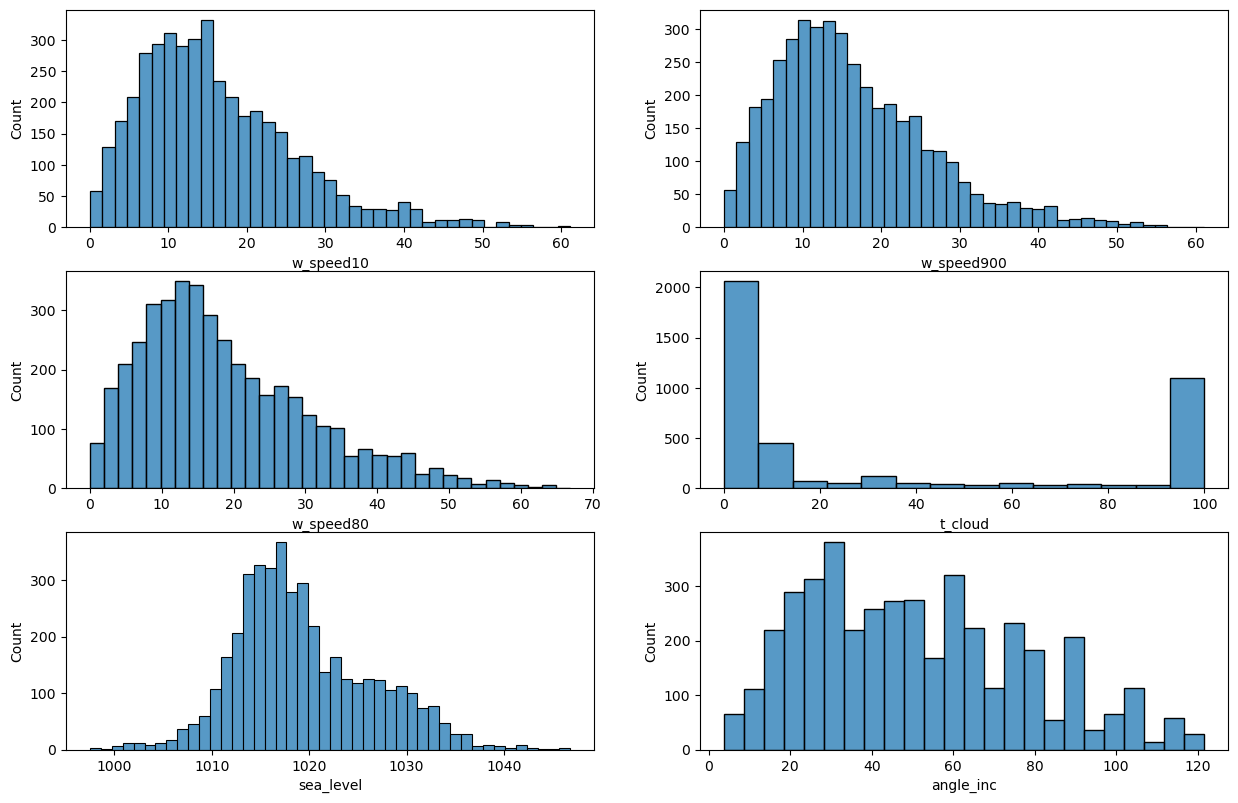

In [18]:
plt.figure(figsize = (15,13))
plt.subplot(4,2,1)
sns.histplot(data=df, x='w_speed10')
plt.subplot(4,2,2)
sns.histplot(data=df, x='w_speed900')
plt.subplot(4,2,3)
sns.histplot(data=df, x='w_speed80')
plt.subplot(4,2,4)
sns.histplot(data=df, x='t_cloud')
plt.subplot(4,2,5)
sns.histplot(data=df, x='sea_level')
plt.subplot(4,2,6)
sns.histplot(data=df, x='angle_inc');

The correlation, distribution and outliers visualizations of other attributes not mentioned above on this chapter (Data Visualization), can be found on the appendix III.

# 4. Data Preparation

Null values were not found.

In [19]:
df.isnull().values.any()

False

In [20]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False).head(21)

temp          0.0
w_direc10     0.0
azimuth       0.0
zenith        0.0
angle_inc     0.0
w_gust        0.0
w_direc900    0.0
w_speed900    0.0
w_direc80     0.0
w_speed80     0.0
w_speed10     0.0
humid         0.0
radiat        0.0
l_cloud       0.0
m_cloud       0.0
h_cloud       0.0
t_cloud       0.0
snowf         0.0
precip        0.0
sea_level     0.0
power         0.0
dtype: float64

Duplicated values were not found.

In [21]:
df_duplicate = df[df.duplicated()]
print("Duplicate Rows :", df_duplicate.sum())

Duplicate Rows : temp          0.0
humid         0.0
sea_level     0.0
precip        0.0
snowf         0.0
t_cloud       0.0
h_cloud       0.0
m_cloud       0.0
l_cloud       0.0
radiat        0.0
w_speed10     0.0
w_direc10     0.0
w_speed80     0.0
w_direc80     0.0
w_speed900    0.0
w_direc900    0.0
w_gust        0.0
angle_inc     0.0
zenith        0.0
azimuth       0.0
power         0.0
dtype: float64


# 5. Modeling & Evaluation

## 5.1 Pre-processing the data

> As was previously mentioned, the variables that are most closely related to our target variable, "power," do not exhibit high skewness or a significant number of outliers. As a result, pre-processing techniques that could bring the data closer to a normal distribution or minimize the excessive effects of outliers are not anticipated to significantly enhance models chosen for machine learning. Additionally, KNeighbors Regressor and Randon Forest Regressor were the strategies selected to tackle the regression problem, as will be shown below.

> As we can verify by the graphs plotted of the most correlated variables to our target variable, it exists a certain characteristic of linearity between these variables. However, a model that views this association as strictly linear would underfit the results since it would be too straightforward to capture the intricacy of the regression studied. To further the presentation of this project, the score for a linear model will be provided in the appendix IV.


### 5.1.1 Train-Test Split and Random Forest Regressor

The dataset will be divided into 80% training and 20% testing for the project's initial methodology. To ensure reproducibility for this analysis, a random state of 38 will be chosen. Tests will then be run on a dataset that has been divided into proportions of 10% and 30% for training.

In [22]:
X = df.drop(columns = 'power').values
y = df['power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 38)

### 5.1.2 Train-Test Split and KNeighbors Regressor

> The division of the dataset in this case is quite similar to the Random Forest model, except that in this case, the independent variables will be standardized using the RobustScaler, and subsequently the dataset will be split by the same proportions. The same random state will be set in this case.

In [23]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state = 38)

> After those procedures, we have the datasets needed to apply our Machine Learning methods.

## 5.2 Random Forest Regressor Model 

In [25]:
randomforestmodel = RandomForestRegressor()

In [26]:
randomforestmodel.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
print("Training Coefficient of determination :", randomforestmodel.score(X_train, y_train))
print("Testing Coefficient of determination :", randomforestmodel.score(X_test, y_test))

Training Coefficient of determination : 0.9719971782461598
Testing Coefficient of determination : 0.8213418119788982


> It is possible to confirm that the coefficient of determination for the training set is higher than the testing set (overfitting). Nevertheless, a testing coefficient of determination of 0.8209 is still a good result, and they are not excessively apart from each other, which classifies the model created as useful to make predictions as proposed in the introduction of this project.



In [28]:
k_folds = KFold(n_splits = 10)

In [29]:
scores = cross_val_score(RandomForestRegressor(), X_train, y_train, scoring = 'r2', cv = k_folds)
print(scores, scores.mean())

[0.7649906  0.81267055 0.78993898 0.84437357 0.76271691 0.79360006
 0.79341854 0.79789484 0.79473862 0.78474695] 0.7939089604607507


> The real R2 to the dataset analyzed utilizing the RandomForest is 0.7914 approximately. Although is a significantly lower result, it is more accurate to the real precision of the model. One way of improving the results found in this method is through the hyperparameters utilized by the method.

> Tuning is the process of determining the ideal hyperparameters, and it is handled by the GridSearch function. Four hyperparameters provided by scikit-learn will be taken into consideration for the Random Forest Regressor in this project. (n.d.): max_features, n_estimators, min_samples_leaf, and min_samples_split
‌

In [30]:
# Create the parameter grid based on the results of random search 
param_gridrf = {
    'min_samples_leaf': range(1,50,100),
    'min_samples_split': range(2,50,100),
    'n_estimators': [100, 300,500], 
    'max_features': [1, 10, 20]
}
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_gridrf, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring="r2")

In [31]:
grid_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [1, 10, 20],
                         'min_samples_leaf': range(1, 50, 100),
                         'min_samples_split': range(2, 50, 100),
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [32]:
# printing the optimal Coefficient of Determination and hyperparameters
print('We can get r2 of',grid_search_rf.best_score_,'using',grid_search_rf.best_params_)

We can get r2 of 0.8003002703559939 using {'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


> As can be seen, the strategy produced an improvement of about 0.007. We believe that the result produced is sufficient for the objective purposed, considering the amount of data provided. Further improvement could possibly be reached tunning more parameters.

### 5.2.1 Fitting the model with the best hyperparameters

In [33]:
randomforestmodelopt = RandomForestRegressor(max_features = 10,
                                          min_samples_leaf =  1,
                                          min_samples_split = 2, 
                                          n_estimators= 500)

In [34]:
randomforestmodelopt.fit(X_train, y_train)

RandomForestRegressor(max_features=10, n_estimators=500)

In [35]:
y_pred_rf = randomforestmodelopt.predict(X_test)

In [36]:
print('Mean_Squared_Error :' ,mean_squared_error(y_test, y_pred_rf))
print('r_square_value :',r2_score(y_test, y_pred_rf))

Mean_Squared_Error : 154032.83284515614
r_square_value : 0.8274248139334288


> It is feasible to confirm that the model performs with an R2 of 0.799 inside the own training dataset and an R2 of 0.8260 within the testing dataset. These values being close together suggests that the model is not overfitting or underfitting but it is rather functioning optimally. 

## 5.3 KNeighbors Regressor Model

> The same procedure will be applied to utilize the machine learning methods of KNeighbors, using at this time the training and testing dataset standardized.

In [37]:
Kneighborsmodel = KNeighborsRegressor()

In [38]:
Kneighborsmodel.fit(X_train_scaled,y_train_scaled)

KNeighborsRegressor()

In [39]:
print("Training Coefficient of determination :", Kneighborsmodel.score(X_train_scaled, y_train_scaled))
print("Testing Coefficient of determination :", Kneighborsmodel.score(X_test_scaled, y_test_scaled))

Training Coefficient of determination : 0.7931459458212848
Testing Coefficient of determination : 0.7270760124842842


In [40]:
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train_scaled, scoring = 'r2', cv = k_folds)
print(scores, scores.mean())

[0.61340899 0.70368328 0.6322615  0.69989516 0.6315504  0.70742988
 0.68823704 0.70153025 0.64648563 0.68756625] 0.6712048390098235


> The decrease in the coefficient of determination following cross-validation can be confirmed. That occurs because several dataset subsets are tested, and the outcome is therefore less skewed.

> In this project, the KNeighbors regressor will consider 3 hyperparameters, provided by scikit-learn. (n.d.): Weight, p: Power parameter and n_neighbors.


In [41]:
# Create the parameter grid based on the results of random search 
param_gridkn = {
    'weights': ['uniform','distance'],
    'p': [1,2], 
    'n_neighbors' : [5, 8, 11, 15]
}
# Instantiate the grid search model
grid_search_kn = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = param_gridkn, 
                           cv = k_folds, n_jobs = -1, verbose = 1, scoring="r2",)

In [42]:
grid_search_kn.fit(X_train_scaled, y_train_scaled)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 8, 11, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [43]:
# printing the optimal Coefficient of Determination and hyperparameters
print('We can get r2 of',grid_search_kn.best_score_,'using',grid_search_kn.best_params_)

We can get r2 of 0.7237545699582916 using {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


> It is feasible to confirm that the tuning of the hyperparameters produced an even greater impact in the case of the KNeighbors algorithm, raising R2 by about 0.05, which is a significant result.

### 5.3.1 Fitting the model with the best hyperparameters 

In [44]:
Knnmodel = KNeighborsRegressor(n_neighbors= 5,
                               p= 1,
                               weights= 'distance')

In [45]:
Knnmodel.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(p=1, weights='distance')

In [46]:
y_pred_kn = Knnmodel.predict(X_test_scaled)

In [47]:
print('Mean_Squared_Error :' ,mean_squared_error(y_test_scaled, y_pred_kn))
print('r_square_value :',r2_score(y_test_scaled, y_pred_kn))

Mean_Squared_Error : 213615.13642125155
r_square_value : 0.7606700387599037


> The model performs even somewhat better when predictions are made using the ideal model, reaching an R2 of 0.7607.

## 5.4 Plotting graphs for analysis

Text(0, 0.5, 'y_test')

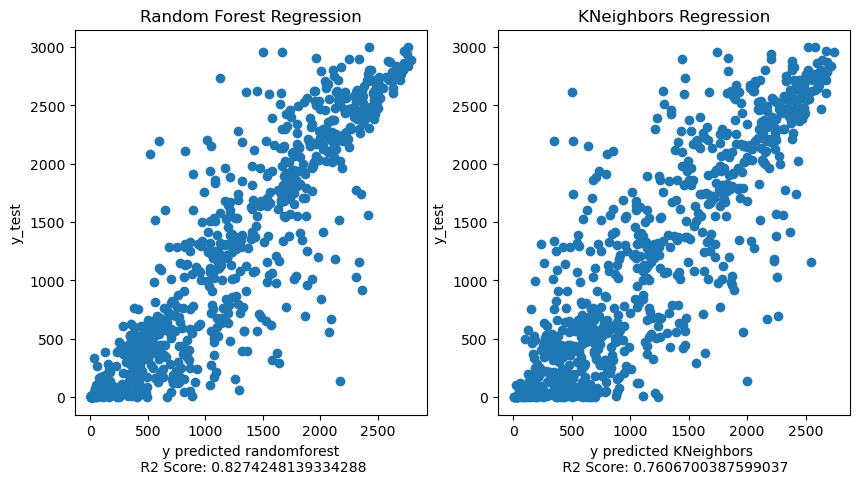

In [48]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Random Forest Regression')
plt.scatter(y_pred_rf,y_test)
plt.xlabel('y predicted randomforest\n R2 Score: {}'.format(r2_score(y_test, y_pred_rf)))
plt.ylabel('y_test')
plt.subplot(1,2,2)
plt.title('KNeighbors Regression')
plt.scatter(y_pred_kn,y_test_scaled)
plt.xlabel('y predicted KNeighbors \n R2 Score: {}'.format(r2_score(y_test, y_pred_kn)))
plt.ylabel('y_test')

> The fit is better the more the points are concentrated on a diagonal from 0 to the point where x=3,000 and y=3,000. The model that comes closest to this ideal representation, as can be seen, is the random forest regression.

## 5.5 Train-Test Split (10%) and Modeling

### 5.5.1 Preparing 10% Train-Test Split

#### 5.5.1.1 Preparing without standardization

In [49]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(X, y, test_size=0.10, random_state = 38)

#### 5.5.1.2 Standardizing 

In [50]:
X_train_scaled10, X_test_scaled10, y_train_scaled10, y_test_scaled10 = train_test_split(X_scaled, y, test_size=0.1, random_state = 38)

## 5.6 Random Forest Regressor Model for 10% Split


In [51]:
randomforestmodel10=RandomForestRegressor()
randomforestmodel10.fit(X_train10, y_train10)
print("Training Coefficient of determination :", randomforestmodel10.score(X_train10, y_train10))
print("Testing Coefficient of determination :", randomforestmodel10.score(X_test10, y_test10))
scores = cross_val_score(RandomForestRegressor(), X_train10, y_train10, scoring = 'r2', cv = k_folds)
print(scores, scores.mean())

Training Coefficient of determination : 0.9726175772670462
Testing Coefficient of determination : 0.7843616253791965
[0.85660149 0.78234877 0.81147097 0.79980319 0.80608196 0.79047927
 0.79181567 0.79110391 0.81177766 0.79143048] 0.8032913375230164


In [52]:
grid_search_rf10 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_gridrf, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring="r2",)
grid_search_rf10.fit(X_train10, y_train10)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [1, 10, 20],
                         'min_samples_leaf': range(1, 50, 100),
                         'min_samples_split': range(2, 50, 100),
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [53]:
# printing the optimal Coefficient of Determination and hyperparametersb
print('We can get r2 of',grid_search_rf10.best_score_,'using',grid_search_rf10.best_params_)

We can get r2 of 0.809589455560012 using {'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


### 5.6.1 Fitting the model with the best hyperparameters 

In [54]:
randomforestmodelopt10 = RandomForestRegressor(max_features = 10,
                                          min_samples_leaf =  1,
                                          min_samples_split = 2, 
                                          n_estimators= 500)
randomforestmodelopt10.fit(X_train10, y_train10)

RandomForestRegressor(max_features=10, n_estimators=500)

In [55]:
y_pred_rf10 = randomforestmodelopt.predict(X_test10)

In [56]:
print('Mean_Squared_Error :' ,mean_squared_error(y_test10, y_pred_rf10))
print('r_square_value :',r2_score(y_test10, y_pred_rf10))

Mean_Squared_Error : 189870.30271218688
r_square_value : 0.7894581666016314


## 5.7 KNeighbors Regressor for 10% Split


In [57]:
Kneighborsmodel10=KNeighborsRegressor()
Kneighborsmodel10.fit(X_train_scaled10, y_train_scaled10)
print("Training Coefficient of determination :", Kneighborsmodel10.score(X_train_scaled10, y_train_scaled10))
print("Testing Coefficient of determination :", Kneighborsmodel10.score(X_test_scaled10, y_test_scaled10))
scores = cross_val_score(RandomForestRegressor(), X_train_scaled10, y_train_scaled10, scoring = 'r2', cv = k_folds)
print(scores, scores.mean())

Training Coefficient of determination : 0.8034244205695205
Testing Coefficient of determination : 0.6999925479917997
[0.85776301 0.78119541 0.80675893 0.80143107 0.81227561 0.79336223
 0.79277821 0.78567505 0.8124869  0.79441538] 0.8038141804695981


In [58]:
grid_search_kn10 = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = param_gridkn, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring="r2",)
grid_search_kn10.fit(X_train_scaled10, y_train_scaled10)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 8, 11, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [59]:
# printing the optimal Coefficient of Determination and hyperparametersb
print('We can get r2 of',grid_search_kn10.best_score_,'using',grid_search_kn10.best_params_)

We can get r2 of 0.733757741215396 using {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


### 5.7.1 Fitting the model with the best hyperparameters 

In [60]:
Knnmodel10 = KNeighborsRegressor(n_neighbors= 11,
                               p= 1,
                               weights= 'distance')
Knnmodel10.fit(X_train_scaled10, y_train_scaled10)

KNeighborsRegressor(n_neighbors=11, p=1, weights='distance')

In [61]:
y_pred_kn10 = Knnmodel.predict(X_test_scaled10)

In [62]:
print('Mean_Squared_Error :' ,mean_squared_error(y_test_scaled10, y_pred_kn10))
print('r_square_value :',r2_score(y_test_scaled10, y_pred_kn10))

Mean_Squared_Error : 232436.06370863135
r_square_value : 0.7422581925552796


## 5.8 Plotting graphs for analysis - 10% Split


Text(0, 0.5, 'y_test')

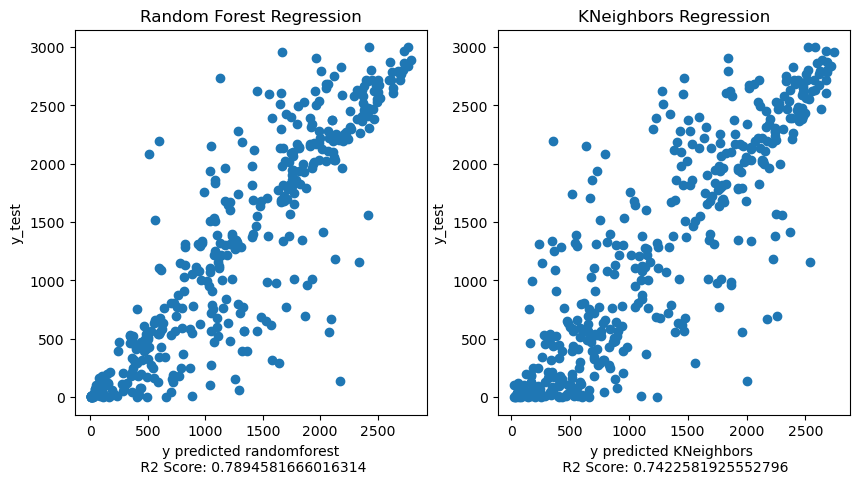

In [63]:
plt.figure(figsize = (10,5))
plt.title('Graph of result for dataset split ')
plt.subplot(1,2,1)
plt.title('Random Forest Regression')
plt.scatter(y_pred_rf10,y_test10)
plt.xlabel('y predicted randomforest\n R2 Score: {}'.format(r2_score(y_test10, y_pred_rf10)))
plt.ylabel('y_test')
plt.subplot(1,2,2)
plt.title('KNeighbors Regression')
plt.scatter(y_pred_kn10,y_test_scaled10)
plt.xlabel('y predicted KNeighbors \n R2 Score: {}'.format(r2_score(y_test10, y_pred_kn10)))
plt.ylabel('y_test')

## 5.9 Train-Test Split (30%) and Modeling

### 5.9.1 Preparing 30% Train-Test Split

#### 5.9.1.1 Preparing without standardization

In [64]:
X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size=0.30, random_state = 38)

#### 5.9.1.2 Standardizing



In [65]:
X_train_scaled30, X_test_scaled30, y_train_scaled30, y_test_scaled30 = train_test_split(X_scaled, y, test_size=0.3, random_state = 38)

## 5.10 Random Forest Regressor for 30% Split


In [66]:
randomforestmodel30=RandomForestRegressor()
randomforestmodel30.fit(X_train30, y_train30)
print("Training Coefficient of determination :", randomforestmodel30.score(X_train30, y_train30))
print("Testing Coefficient of determination :", randomforestmodel30.score(X_test30, y_test30))
scores = cross_val_score(RandomForestRegressor(), X_train30, y_train30, scoring = 'r2', cv = k_folds)
print(scores, scores.mean())

Training Coefficient of determination : 0.9711035509045275
Testing Coefficient of determination : 0.8071684299387343
[0.78865842 0.80230255 0.82725022 0.76569609 0.78792216 0.77965323
 0.77034014 0.83974379 0.7879277  0.76295493] 0.7912449228421597


In [67]:
grid_search_rf30 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_gridrf, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring="r2",)
grid_search_rf30.fit(X_train30, y_train30)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [1, 10, 20],
                         'min_samples_leaf': range(1, 50, 100),
                         'min_samples_split': range(2, 50, 100),
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [68]:
# printing the optimal Coefficient of Determination and hyperparametersb
print('We can get r2 of',grid_search_rf30.best_score_,'using',grid_search_rf30.best_params_)

We can get r2 of 0.7984339979621644 using {'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


### 5.10.1 Fitting the model with the best hyperparameters 

In [69]:
randomforestmodelopt30 = RandomForestRegressor(max_features = 10,
                                          min_samples_leaf =  1,
                                          min_samples_split = 2, 
                                          n_estimators= 500)
randomforestmodelopt30.fit(X_train30, y_train30)

RandomForestRegressor(max_features=10, n_estimators=500)

In [70]:
y_pred_rf30 = randomforestmodelopt30.predict(X_test30)

In [71]:
print('Mean_Squared_Error :' ,mean_squared_error(y_test30, y_pred_rf30))
print('r_square_value :',r2_score(y_test30, y_pred_rf30))

Mean_Squared_Error : 168331.1405843192
r_square_value : 0.809820509815979


## 5.11 KNeighbors Regressor for 30% Split


In [72]:
Kneighborsmodel30=KNeighborsRegressor()
Kneighborsmodel30.fit(X_train_scaled30, y_train_scaled30)
print("Training Coefficient of determination :", Kneighborsmodel30.score(X_train_scaled30, y_train_scaled30))
print("Testing Coefficient of determination :", Kneighborsmodel30.score(X_test_scaled30, y_test_scaled30))
scores = cross_val_score(RandomForestRegressor(), X_train_scaled30, y_train_scaled30, scoring = 'r2', cv = k_folds)
print(scores, scores.mean())

Training Coefficient of determination : 0.7873709917022376
Testing Coefficient of determination : 0.6840318943864963
[0.7918267  0.79564643 0.8276414  0.76949527 0.78263237 0.78131703
 0.77180293 0.83464434 0.78324678 0.7684908 ] 0.7906744064436377


In [73]:
grid_search_kn30 = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = param_gridkn, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring="r2",)
grid_search_kn30.fit(X_train_scaled30, y_train_scaled30)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 8, 11, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [74]:
# printing the optimal Coefficient of Determination and hyperparametersb
print('We can get r2 of',grid_search_kn30.best_score_,'using',grid_search_kn30.best_params_)

We can get r2 of 0.7219583027339469 using {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


### 5.11.1 Fitting the model with the best hyperparameters 

In [75]:
Knnmodel30 = KNeighborsRegressor(n_neighbors= 8,
                               p= 1,
                               weights= 'distance')
Knnmodel30.fit(X_train_scaled30, y_train_scaled30)

KNeighborsRegressor(n_neighbors=8, p=1, weights='distance')

In [76]:
y_pred_kn30 = Knnmodel30.predict(X_test_scaled30)

In [77]:
print('Mean_Squared_Error :' ,mean_squared_error(y_test_scaled30, y_pred_kn30))
print('r_square_value :',r2_score(y_test_scaled30, y_pred_kn30))

Mean_Squared_Error : 250248.506194207
r_square_value : 0.7172707725847813


## 5.12 Plotting graphs of results for all tests executed

Text(0, 0.5, 'y_test')

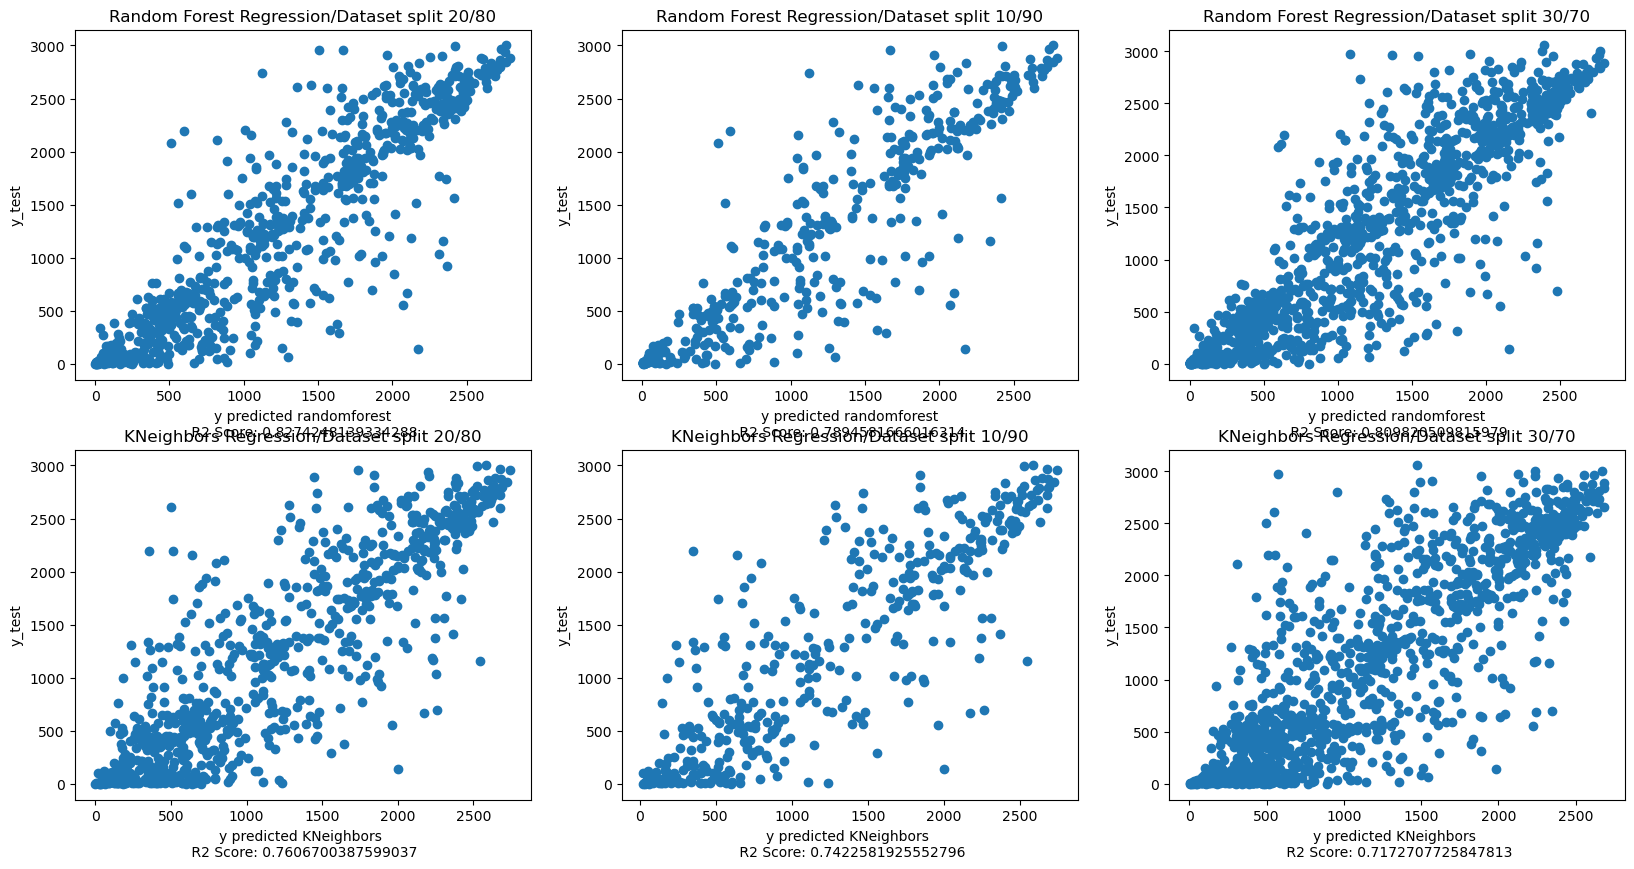

In [78]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
plt.title('Random Forest Regression/Dataset split 20/80')
plt.scatter(y_pred_rf,y_test)
plt.xlabel('y predicted randomforest\n R2 Score: {}'.format(r2_score(y_test, y_pred_rf)))
plt.ylabel('y_test')
plt.subplot(2,3,2)
plt.title('Random Forest Regression/Dataset split 10/90')
plt.scatter(y_pred_rf10,y_test10)
plt.xlabel('y predicted randomforest\n R2 Score: {}'.format(r2_score(y_test10, y_pred_rf10)))
plt.ylabel('y_test')
plt.subplot(2,3,3)
plt.title('Random Forest Regression/Dataset split 30/70')
plt.scatter(y_pred_rf30,y_test30)
plt.xlabel('y predicted randomforest\n R2 Score: {}'.format(r2_score(y_test30, y_pred_rf30)))
plt.ylabel('y_test')
plt.subplot(2,3,4)
plt.title('KNeighbors Regression/Dataset split 20/80')
plt.scatter(y_pred_kn,y_test_scaled)
plt.xlabel('y predicted KNeighbors \n R2 Score: {}'.format(r2_score(y_test, y_pred_kn)))
plt.ylabel('y_test')
plt.subplot(2,3,5)
plt.title('KNeighbors Regression/Dataset split 10/90')
plt.scatter(y_pred_kn10,y_test_scaled10)
plt.xlabel('y predicted KNeighbors \n R2 Score: {}'.format(r2_score(y_test10, y_pred_kn10)))
plt.ylabel('y_test')
plt.subplot(2,3,6)
plt.title('KNeighbors Regression/Dataset split 30/70')
plt.scatter(y_pred_kn30,y_test_scaled30)
plt.xlabel('y predicted KNeighbors \n R2 Score: {}'.format(r2_score(y_test30, y_pred_kn30)))
plt.ylabel('y_test')

# 6. Conclusion

> Skewness values were obtained from this analysis, which demonstrated that the distributional features of all the collected data varied. As the construction of the prediction model continued, the obtained data were examined for the presence of missing data and it was determined that no additional data cleaning was required.

> After PCA analysis, it was concluded that there was no need to apply it and the Machine Learning Algorithms Linear Regression, Decision Tree, Random Forest, and KNN models were analyzed to predict the dependent variable. After the results, only Random Forest and KNN were chosen in this project to be processed and analyzed as predictor algorithms.

> After applying the two algorithms we obtained an R-squared value of 0.81 for RF and 0.72 for KNN. After that, we applied the hyperparameters to control the learning process and the values presented were 0.82 for RF and 0.76 for KNN.

> It is possible to conclude that Random Forest is the best model to predict the studied Data.


# 7. Reference List

* Arya, N. (2022). KDnuggets. (n.d.). Does the Random Forest Algorithm Need Normalization? [online] Available at: https://www.kdnuggets.com/2022/07/random-forest-algorithm-need-normalization.html.

* Goyal, C. (2021). Importance of Cross Validation: Are Evaluation Metrics enough? [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/05/importance-of-cross-validation-are-evaluation-metrics-enough/.

* Nyuytiymbiy, K. (2022). Parameters and Hyperparameters in Machine Learning and Deep Learning. [online] Medium. Available at: https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac#:~:text=Hyperparameters%20are%20parameters%20whose%20values.
 
* scikit-learn. (n.d.). sklearn.ensemble.RandomForestRegressor. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#:~:text=A%20random%20forest%20regressor..

* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html


‌

# 8. Appendix

## Appendix I: Data Dictionary
1. temperature_2_m_above_gnd - Temperature of the air 2 meters above the level of the ground.
2. relative_humidity_2_m_above_gnd - Relative humidity 2 meters above the level of the ground.
3. mean_sea_level_pressure_MSL - Mean sea level pressure
4. total_precipitation_sfc - Total precipitation of surface
5. snowfall_amount_sfc - Total precipitation of snow of surface
6. total_cloud_cover_sfc - Fraction of the sky covered by all visible clouds.
7. High_cloud_cover_high_cld_lay - Covering of clouds over 20,000 ft in altitude.
8. medium_cloud_cover_mid_cld_lay - Corering of clouds over 6,000 ft and under 20,000 ft in altitude.
9. low_cloud_cover_mid_cld_lay - Corering of clouds under 6.000 ft in altitude.
10. shortwave_radiation_backwards_sfc - Radiant energy produced by the sun
11. wind_speed_10_m_above_gnd - wind speed 10 meters above the ground
12. wind_direction_10_m_above_gnd - direction of wind 10 meters above the ground (measured in degrees from true north).
13. wind_speed_80_m_above_gnd - wind speed 80 meters above the ground
14. wind_direction_80_m_above_gnd - direction of wind 10 meters above the ground (measured in degrees from true north).
15. wind_speed_900_mb - wind speed 900 meters above the ground.
16. wind_direction_900_mb - direction of wind 900 meters above the ground 
17. wind_gust_10_m_above_gnd - Used to describe the turbulence of wind. Define as the highst wind speed during the past hour, 10 meters above the ground.
18. angle_of_incidence - angle between sun's ray and a normal vector to the surface of a solar board.
19. Zenith - Angle between sun's ray and a normal vector to the surface of the Earth.
20. Azimuth - Angle between the projection of sun's ray on the surface of the Earth, and the true North of Earth, measured in clockwise way.
21. generated_power_kw - Power generated by solar plant.



## Appendix II: Renamed Columns Glossary
<br> temp = temperature_2_m_above_gnd
<br> humid = relative_humidity_2_m_above_gnd
<br> sea_level = mean_sea_level_pressure_MSL
<br> precip = total_precipitation_sfc
<br> snowf = snowfall_amount_sfc
<br> t_cloud = total_cloud_cover_sfc
<br> h_cloud = high_cloud_cover_high_cld_lay
<br> m_cloud = medium_cloud_cover_mid_cld_lay
<br> l_cloud = low_cloud_cover_low_cld_lay
<br> radiat = shortwave_radiation_backwards_sfc
<br> w_speed10 = wind_speed_10_m_above_gnd
<br> w_direc10 = wind_direction_10_m_above_gnd
<br> w_speed80 = wind_speed_80_m_above_gnd
<br> w_direc80 = wind_direction_80_m_above_gnd
<br> w_speed900 = wind_speed_900_mb
<br> w_direc900 = wind_direction_900_mb
<br> w_gust = wind_gust_10_m_above_gnd
<br> angle_inc = angle_of_incidence
<br> zenith = zenith
<br> azimuth = azimuth
<br> power = generated_power_kw

##  Appendix IIII: Others Correlations among variables

In [79]:
#zenith  radiat -0.8 
#humid temp -0.77 
#humid radia -0.72 
#radit angle_inc -0.58
#azimuth humid -0.53
#zenith  temp -0.55

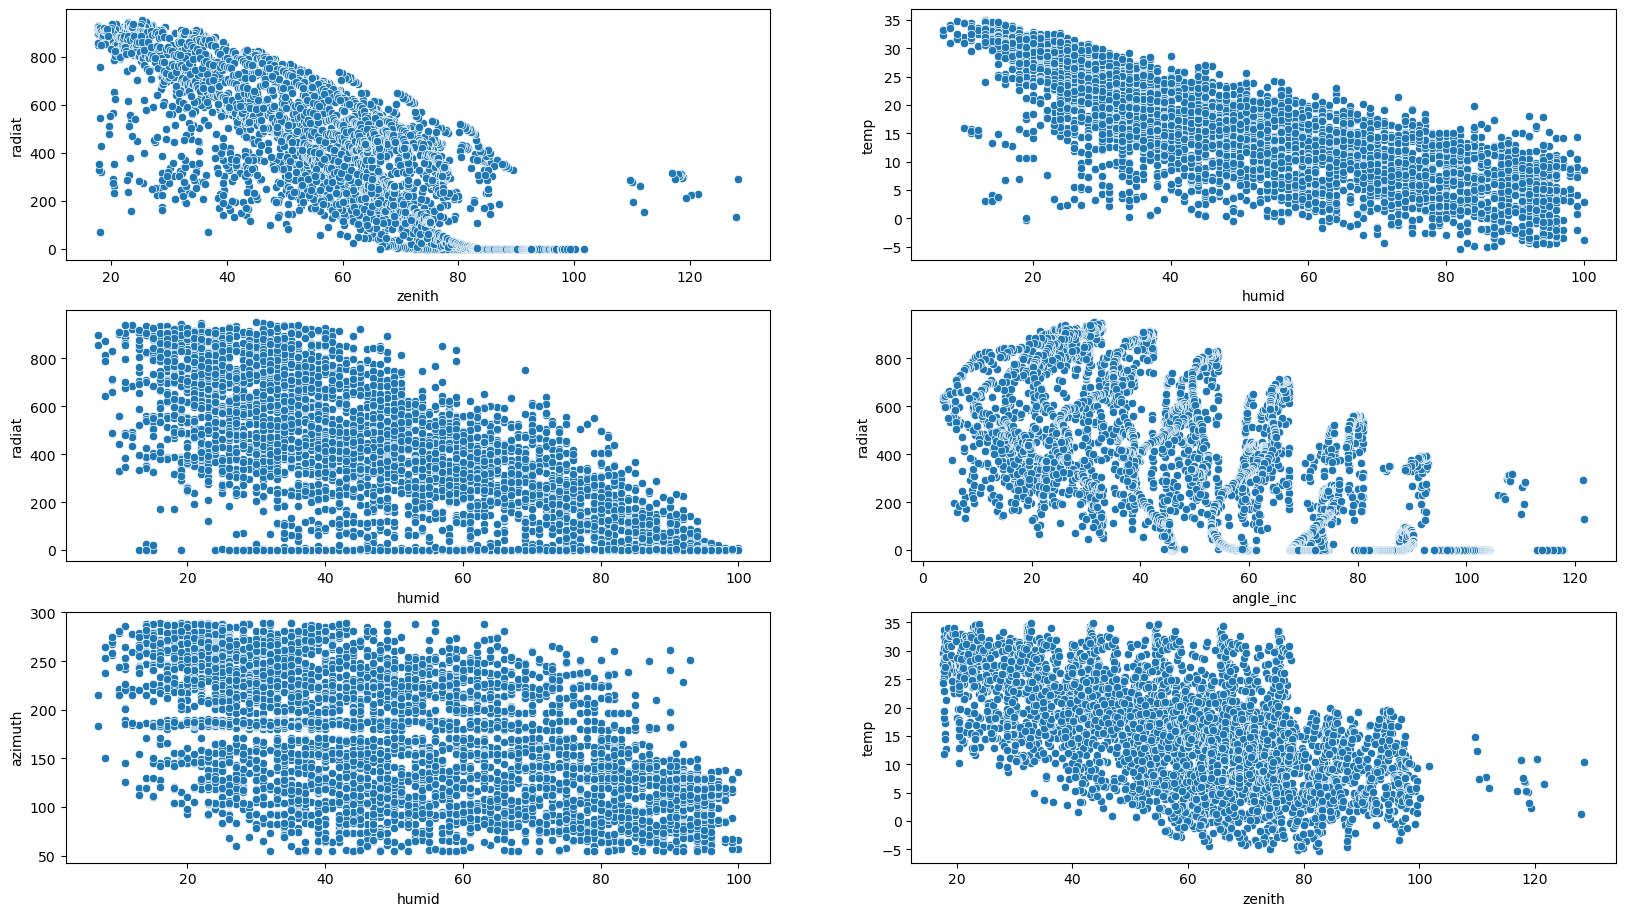

In [80]:
plt.figure(figsize = (20,15))
plt.subplot(4,2,1)
sns.scatterplot(x = "zenith", y="radiat",data=df)
plt.subplot(4,2,2)
sns.scatterplot(x = 'humid', y='temp',data=df)
plt.subplot(4,2,3)
sns.scatterplot(x = 'humid', y='radiat',data=df)
plt.subplot(4,2,4)
sns.scatterplot(x = 'angle_inc', y='radiat',data=df)
plt.subplot(4,2,5)
sns.scatterplot(x = 'humid', y='azimuth',data=df)
plt.subplot(4,2,6)
sns.scatterplot(x = 'zenith', y='temp',data=df);

Correlations =<-0.5 to plot

In [81]:
#w_speed900 0.89 w_gust
#w_direc10 w_direc80 0.89
#l_cloud t_cloud 0.75
#zenith  angle_inc 0.71
#m_cloud t_cloud 0.71 
#radit temp 0.67
#radit zenith 0.55
#azimuth radiat 0.55

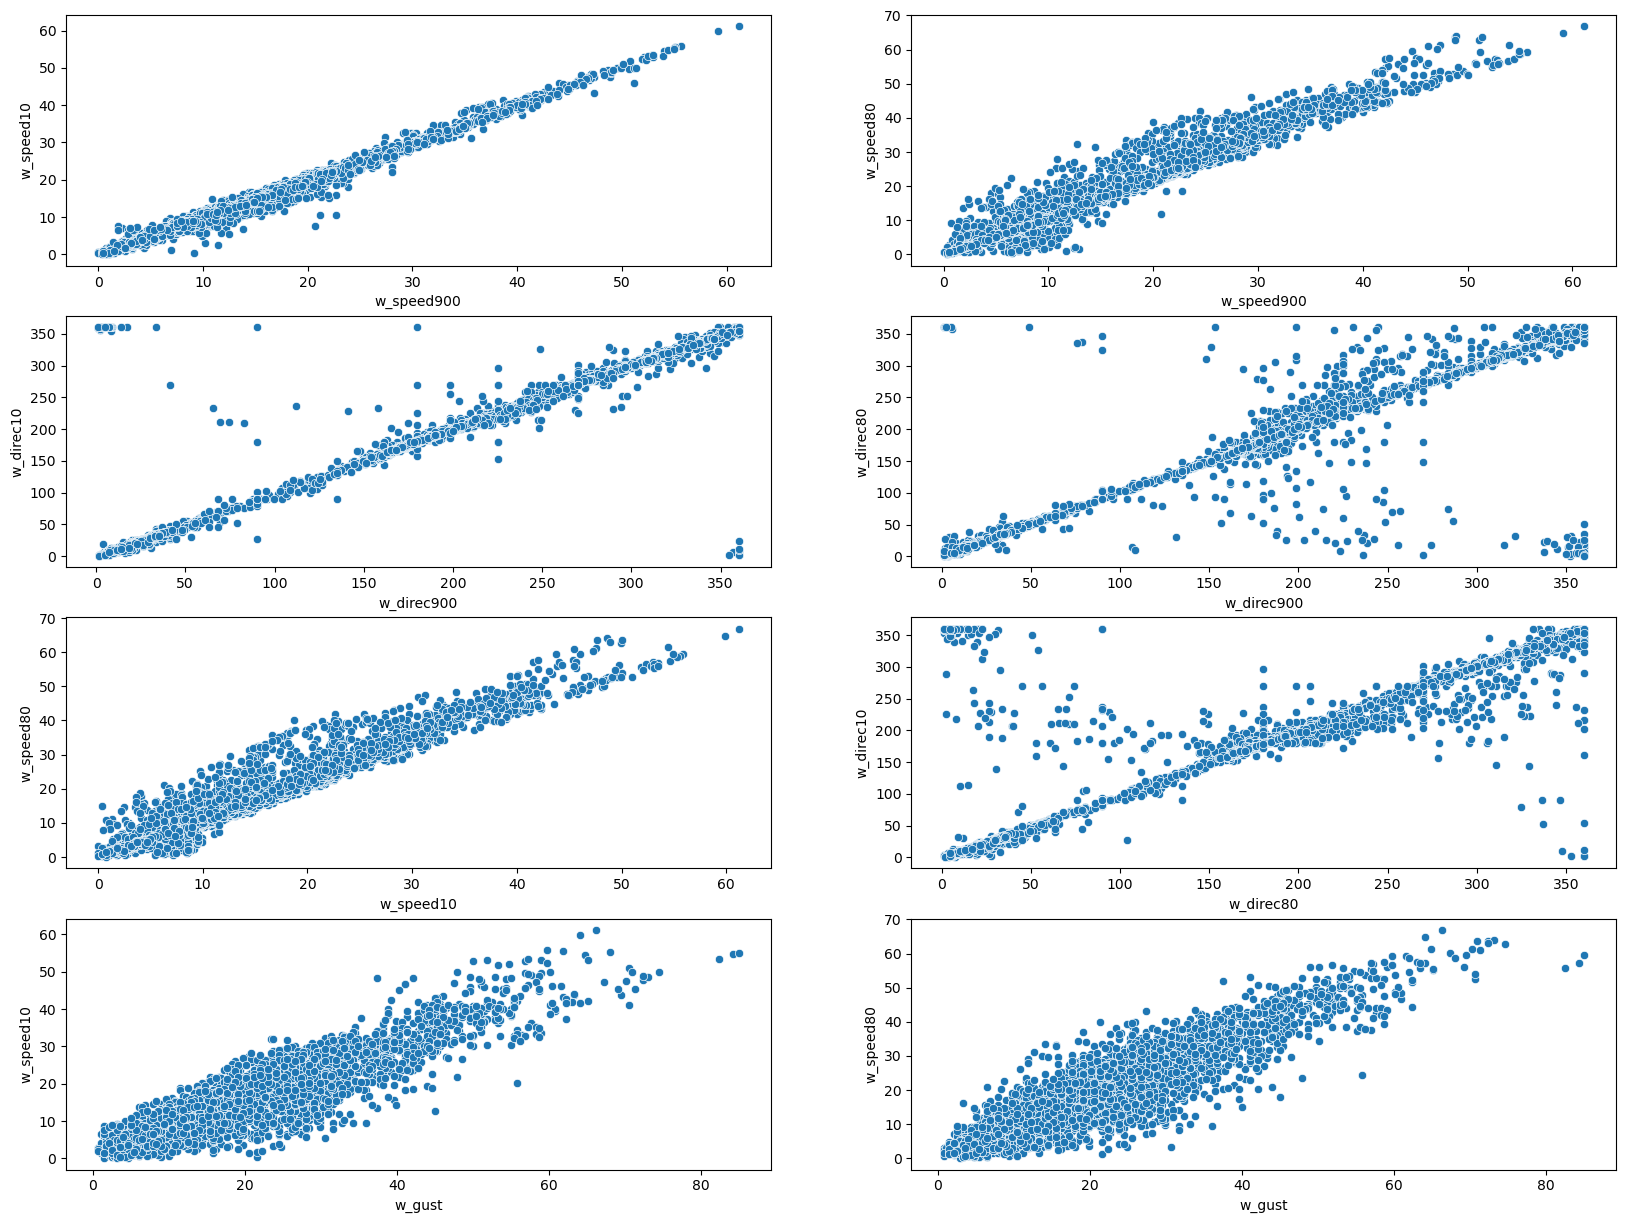

In [82]:
plt.figure(figsize = (20,15))
plt.subplot(4,2,1)
sns.scatterplot(x = "w_speed900", y="w_speed10",data=df)
plt.subplot(4,2,2)
sns.scatterplot(x = 'w_speed900', y='w_speed80',data=df)
plt.subplot(4,2,3)
sns.scatterplot(x = 'w_direc900', y='w_direc10',data=df)
plt.subplot(4,2,4)
sns.scatterplot(x = 'w_direc900', y='w_direc80',data=df)
plt.subplot(4,2,5)
sns.scatterplot(x = 'w_speed10', y='w_speed80',data=df)
plt.subplot(4,2,6)
sns.scatterplot(x = 'w_direc80', y='w_direc10',data=df)
plt.subplot(4,2,7)
sns.scatterplot(x = 'w_gust', y='w_speed10',data=df)
plt.subplot(4,2,8)
sns.scatterplot(x = 'w_gust', y='w_speed80',data=df);

Correlations between 0.9 and 0.5 to plot

'temp', 'humid',  'radiat', 'w_direc10', , 'w_direc80', , 'w_direc900','zenith', 'azimuth', 'power'

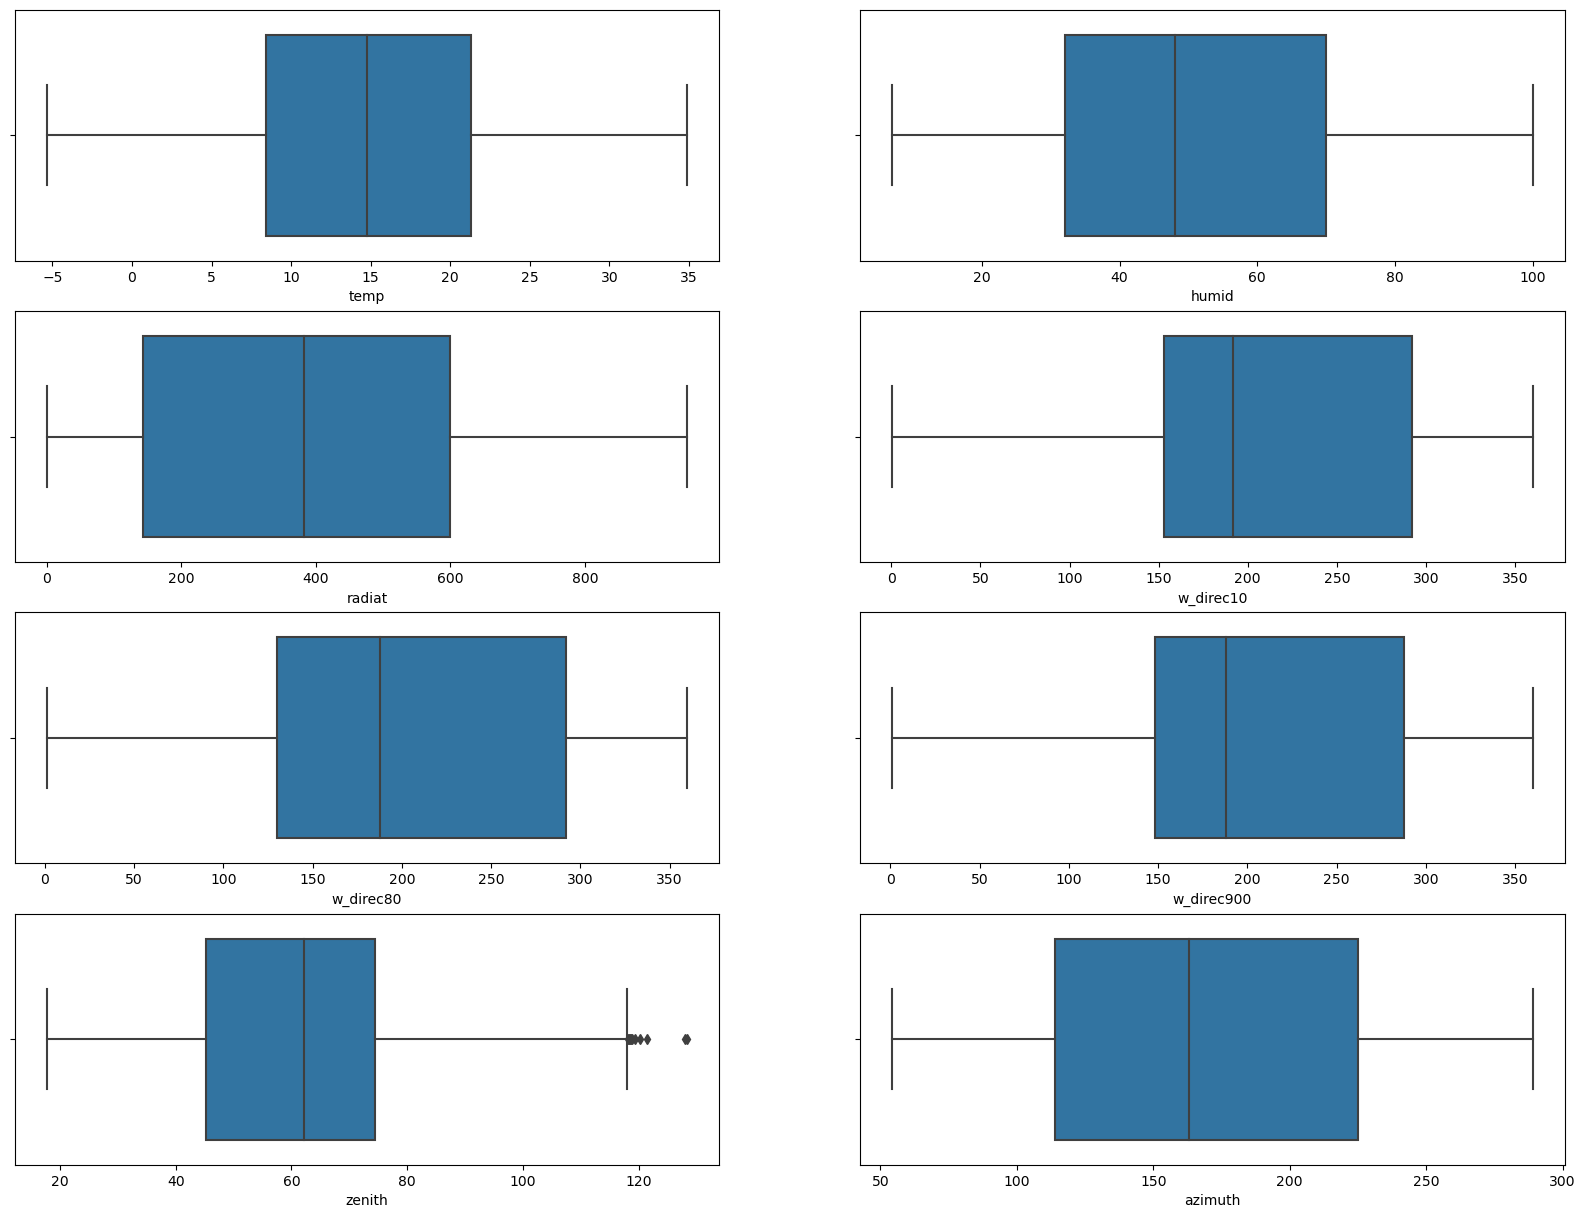

In [83]:
plt.figure(figsize = (20,15))
plt.subplot(4,2,1)
sns.boxplot(x = 'temp',data=df)
plt.subplot(4,2,2)
sns.boxplot(x = 'humid',data=df)
plt.subplot(4,2,3)
sns.boxplot(x = 'radiat',data=df)
plt.subplot(4,2,4)
sns.boxplot(x = 'w_direc10',data=df)
plt.subplot(4,2,5)
sns.boxplot(x = 'w_direc80',data=df)
plt.subplot(4,2,6)
sns.boxplot(x = 'w_direc900',data=df)
plt.subplot(4,2,7)
sns.boxplot(x = 'zenith',data=df)
plt.subplot(4,2,8)
sns.boxplot(x = 'azimuth',data=df);

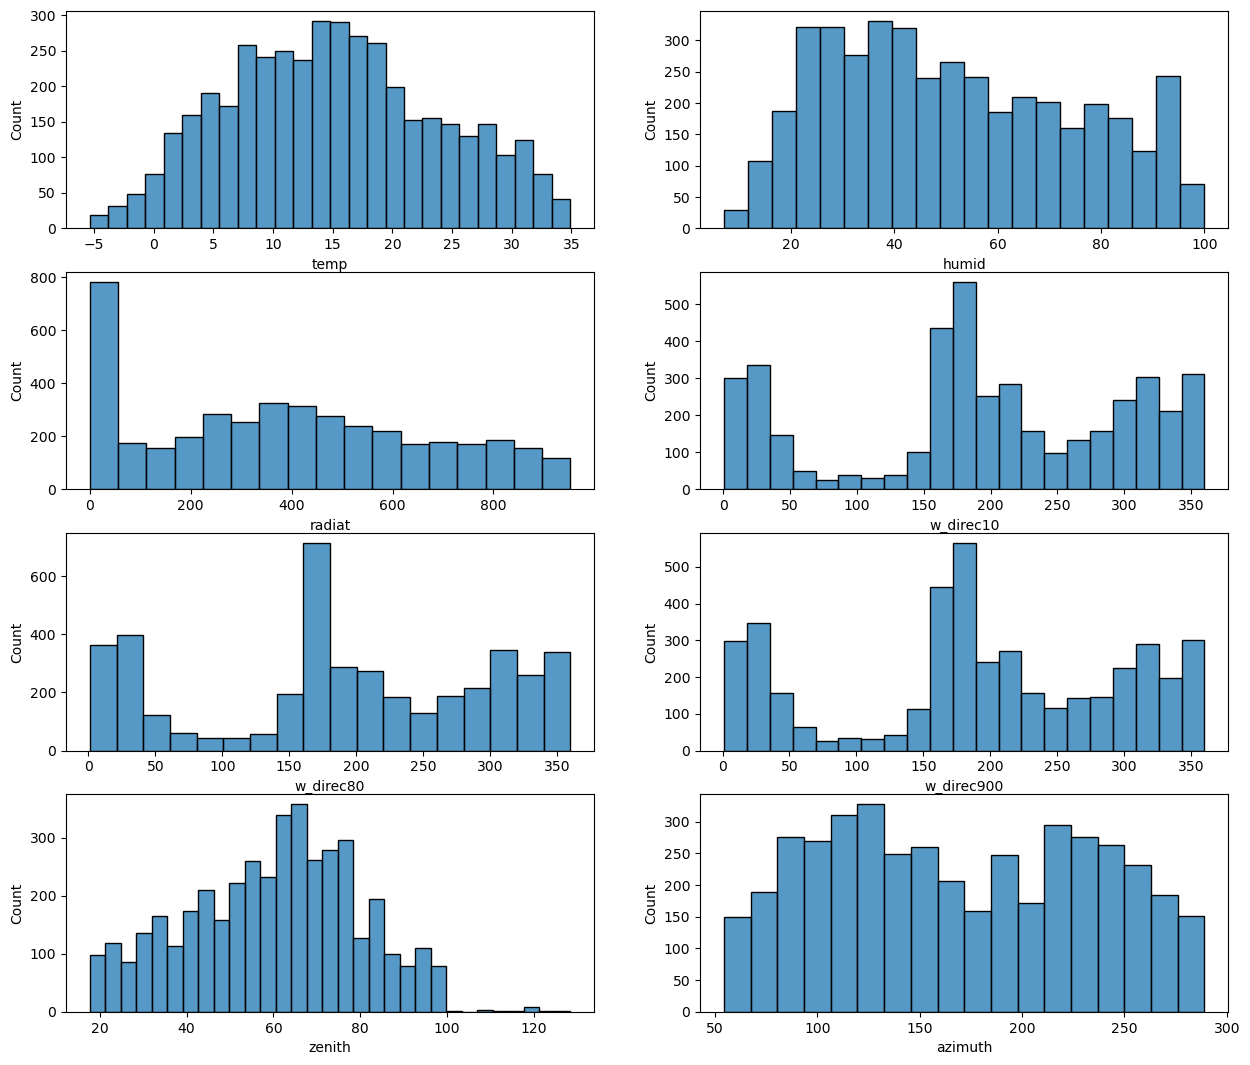

In [84]:
plt.figure(figsize = (15,13))
plt.subplot(4,2,1)
sns.histplot(data=df, x='temp')
plt.subplot(4,2,2)
sns.histplot(data=df, x='humid')
plt.subplot(4,2,3)
sns.histplot(data=df, x='radiat')
plt.subplot(4,2,4)
sns.histplot(data=df, x='w_direc10')
plt.subplot(4,2,5)
sns.histplot(data=df, x='w_direc80')
plt.subplot(4,2,6)
sns.histplot(data=df, x='w_direc900')
plt.subplot(4,2,7)
sns.histplot(data=df, x='zenith')
plt.subplot(4,2,8)
sns.histplot(data=df, x='azimuth');

## Appendix VI:  Machine Learning Tests

### Training a model with linear regression and generating predictions with it

In [85]:
linearmodel = LinearRegression()

In [86]:
scores = cross_val_score(LinearRegression(), X_train_scaled, y_train_scaled, scoring = 'r2', cv = k_folds)
print(scores, scores.mean())

[0.68107853 0.69053411 0.6725782  0.7271653  0.67003615 0.70901445
 0.72360026 0.73145132 0.69592498 0.68253852] 0.6983921826374724


In [87]:
lr = linearmodel.fit(X_train_scaled, y_train_scaled)

In [88]:
y_pred_lr = lr.predict(X_test_scaled)

In [89]:
print('Mean_Squared_Error :' ,mean_squared_error(y_test_scaled, y_pred_lr))
print('r_square_value :',r2_score(y_test_scaled, y_pred_lr))

Mean_Squared_Error : 248132.8441131969
r_square_value : 0.7219971161271216


### Training a model with decision trees  and generating predictions with it

In [90]:
decisiontreemodel = DecisionTreeRegressor()

In [91]:
scores = cross_val_score(DecisionTreeRegressor(), X_train, y_train, scoring = 'r2', cv = k_folds)
print(scores, scores.mean())

[0.55453595 0.63646733 0.57764511 0.65760132 0.6313035  0.52452136
 0.58879702 0.55761408 0.53679646 0.56357185] 0.5828853980373971


In [92]:
tree = decisiontreemodel.fit(X_train, y_train)

In [93]:
y_pred_tree = tree.predict(X_test)

In [94]:
print('Mean_Squared_Error :' ,mean_squared_error(y_test_scaled, y_pred_tree))
print('r_square_value :',r2_score(y_test_scaled, y_pred_tree))

Mean_Squared_Error : 340466.45110940974
r_square_value : 0.6185484609719737


### Training a model with linear regression and generating predictions with it - FOR DATASET SPLIT 10/90

In [95]:
lr10 = linearmodel.fit(X_train_scaled10, y_train_scaled10)
y_pred_lr10 = lr10.predict(X_test_scaled10)
print('Mean_Squared_Error :' ,mean_squared_error(y_test_scaled10, y_pred_lr10))
print('r_square_value :',r2_score(y_test_scaled10, y_pred_lr10))

Mean_Squared_Error : 268843.0689325369
r_square_value : 0.7018874894021685


### Training a model with Decision Tree Regressor and generating predictions with it - FOR DATASET SPLIT 10/90

In [96]:
tree10 = decisiontreemodel.fit(X_train10, y_train10)
y_pred_tree10 = tree10.predict(X_test10)
print('Mean_Squared_Error :' ,mean_squared_error(y_test_scaled10, y_pred_tree10))
print('r_square_value :',r2_score(y_test_scaled10, y_pred_tree10))

Mean_Squared_Error : 419243.73759598826
r_square_value : 0.5351124220408252


### Training a model with linear regression and generating predictions with it - FOR DATASET SPLIT 30/70

In [97]:
lr30 = linearmodel.fit(X_train_scaled30, y_train_scaled30)
y_pred_lr30 = lr30.predict(X_test_scaled30)
print('Mean_Squared_Error :' ,mean_squared_error(y_test_scaled30, y_pred_lr30))
print('r_square_value :',r2_score(y_test_scaled30, y_pred_lr30))

Mean_Squared_Error : 256824.87859782483
r_square_value : 0.709840827378928


### Training a model with Decision Tree Regressor and generating predictions with it - FOR DATASET SPLIT 30/70


In [98]:
tree30 = decisiontreemodel.fit(X_train30, y_train30)
y_pred_tree30 = tree30.predict(X_test30)
print('Mean_Squared_Error :' ,mean_squared_error(y_test_scaled10, y_pred_tree10))
print('r_square_value :',r2_score(y_test_scaled10, y_pred_tree10))

Mean_Squared_Error : 419243.73759598826
r_square_value : 0.5351124220408252


## Appendix V: Plots of all the graphs side by side

Text(0, 0.5, 'y_test')

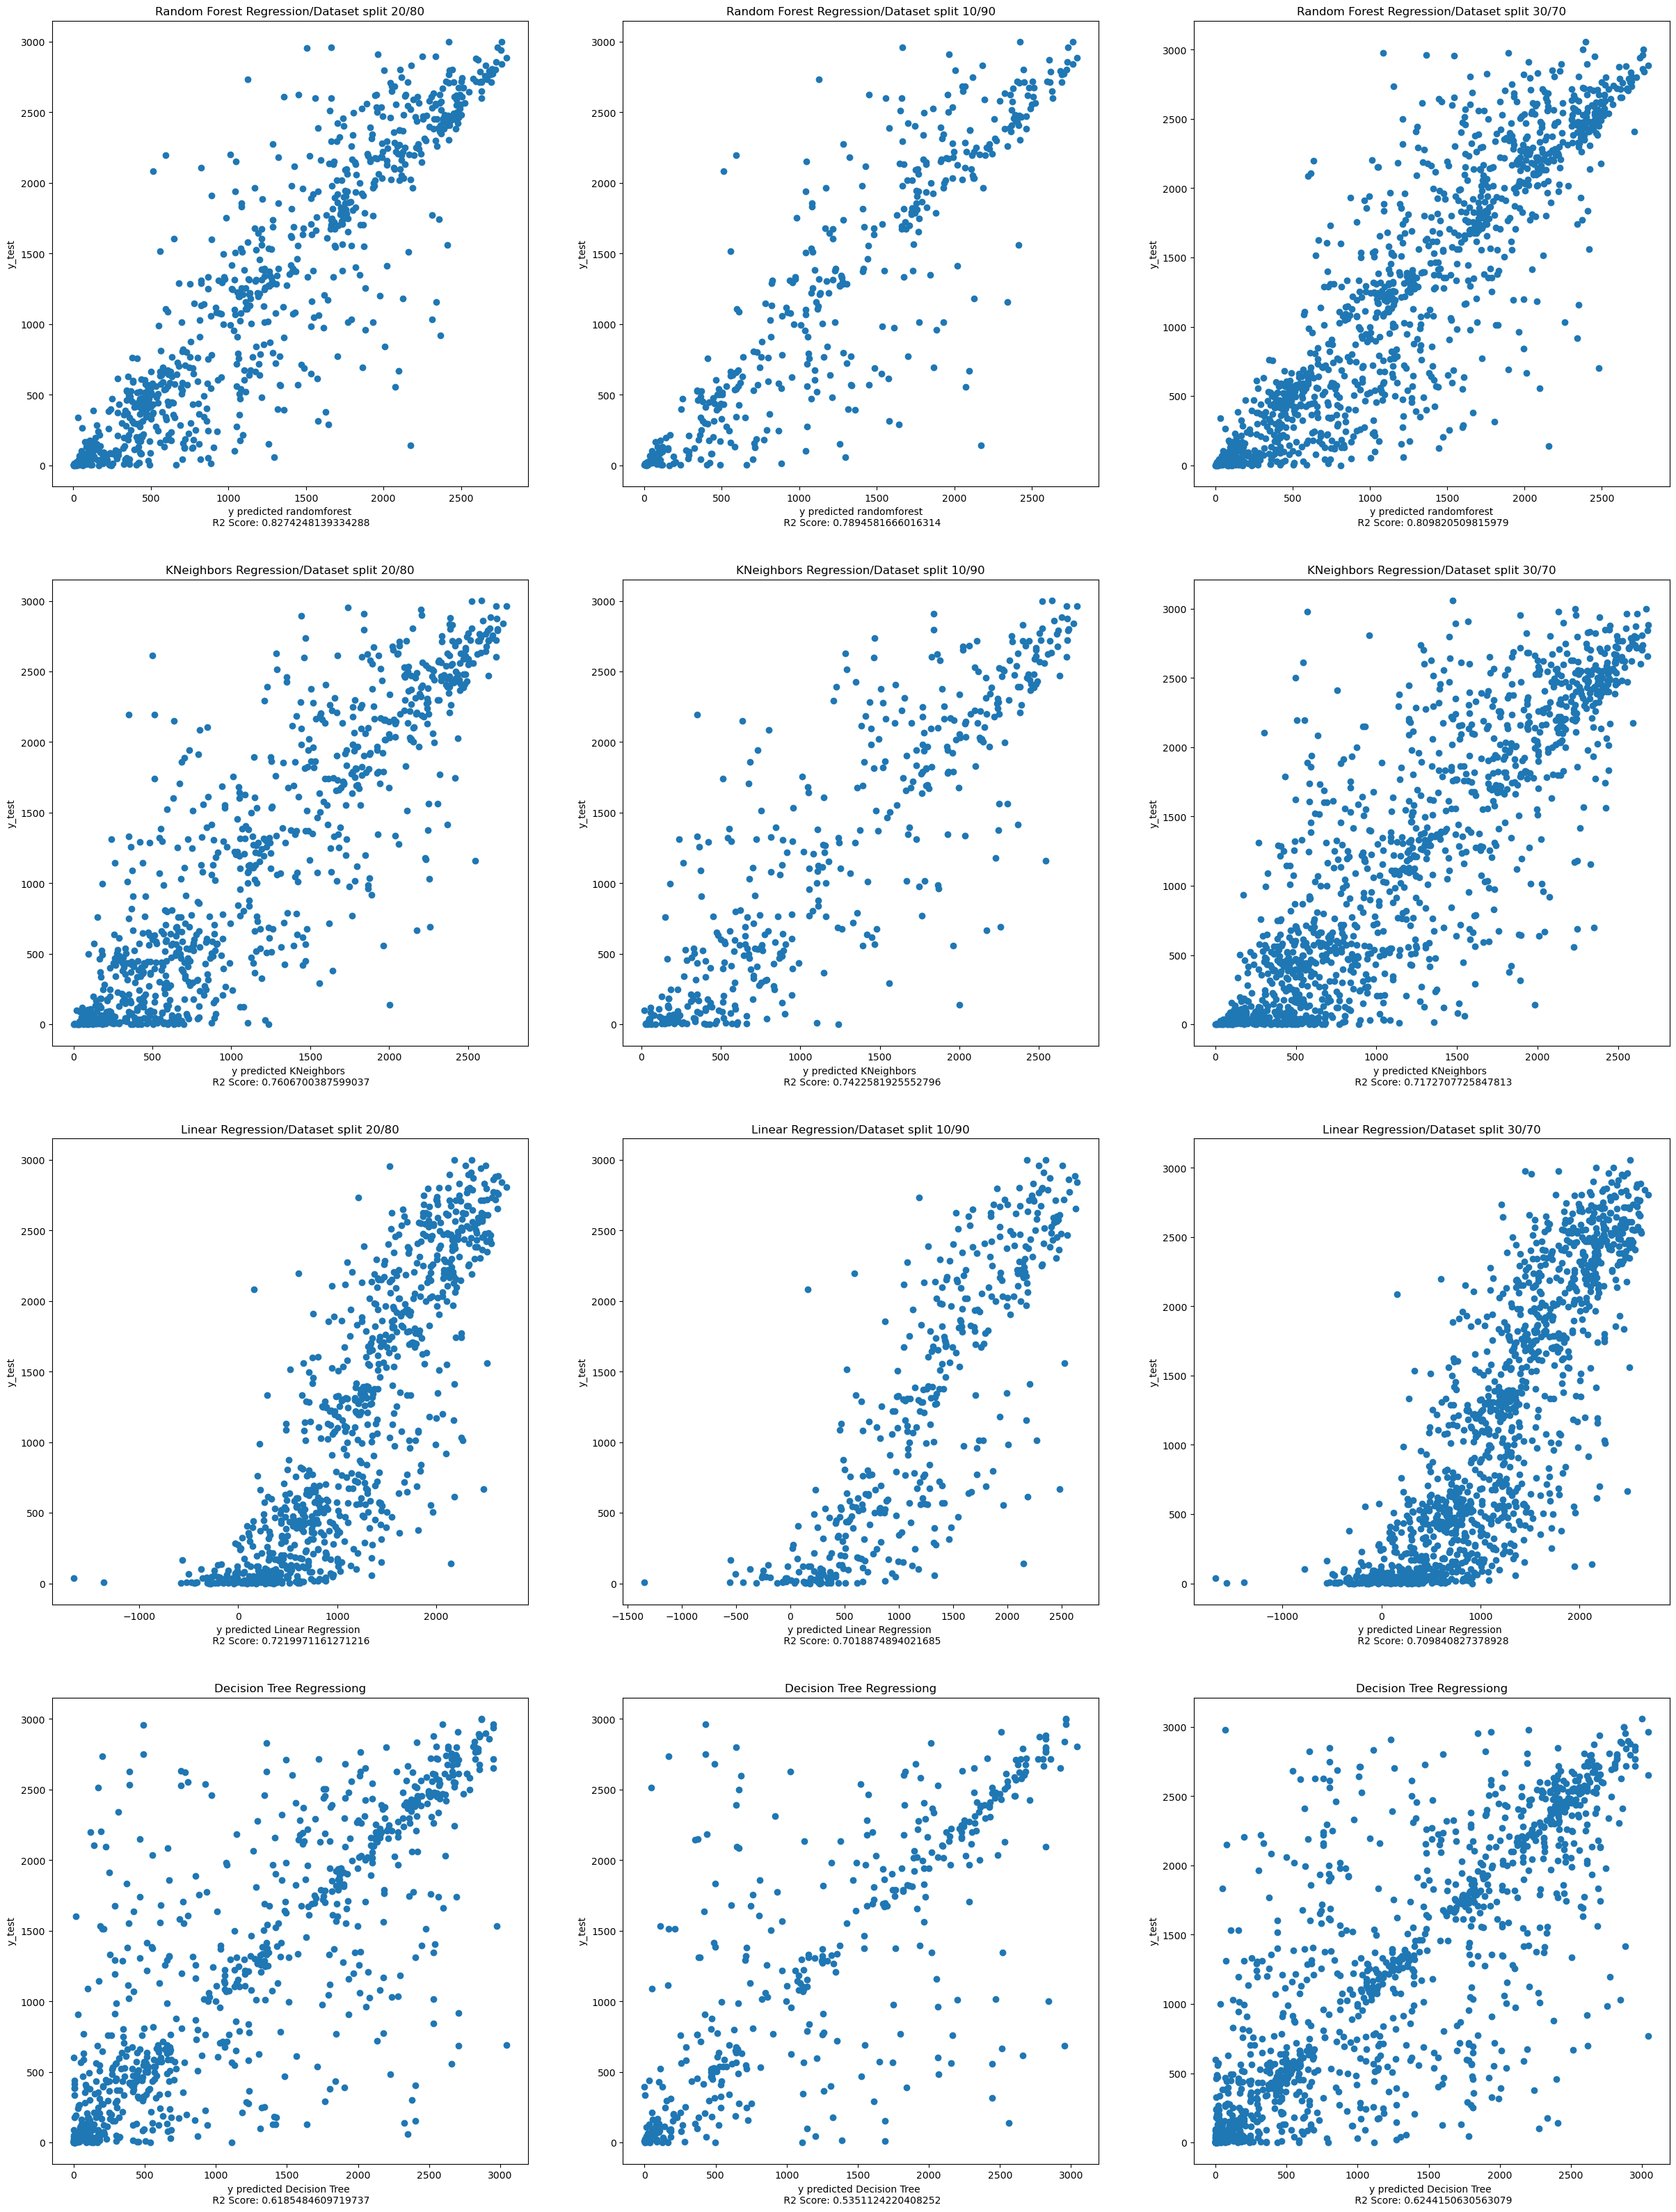

In [99]:
plt.figure(figsize = (30,40))
plt.subplot(4,3,1)
plt.title('Random Forest Regression/Dataset split 20/80')
plt.scatter(y_pred_rf,y_test)
plt.xlabel('y predicted randomforest\n R2 Score: {}'.format(r2_score(y_test, y_pred_rf)))
plt.ylabel('y_test')
plt.subplot(4,3,2)
plt.title('Random Forest Regression/Dataset split 10/90')
plt.scatter(y_pred_rf10,y_test10)
plt.xlabel('y predicted randomforest\n R2 Score: {}'.format(r2_score(y_test10, y_pred_rf10)))
plt.ylabel('y_test')
plt.subplot(4,3,3)
plt.title('Random Forest Regression/Dataset split 30/70')
plt.scatter(y_pred_rf30,y_test30)
plt.xlabel('y predicted randomforest\n R2 Score: {}'.format(r2_score(y_test30, y_pred_rf30)))
plt.ylabel('y_test')
plt.subplot(4,3,4)
plt.title('KNeighbors Regression/Dataset split 20/80')
plt.scatter(y_pred_kn,y_test_scaled)
plt.xlabel('y predicted KNeighbors \n R2 Score: {}'.format(r2_score(y_test, y_pred_kn)))
plt.ylabel('y_test')
plt.subplot(4,3,5)
plt.title('KNeighbors Regression/Dataset split 10/90')
plt.scatter(y_pred_kn10,y_test_scaled10)
plt.xlabel('y predicted KNeighbors \n R2 Score: {}'.format(r2_score(y_test10, y_pred_kn10)))
plt.ylabel('y_test')
plt.subplot(4,3,6)
plt.title('KNeighbors Regression/Dataset split 30/70')
plt.scatter(y_pred_kn30,y_test_scaled30)
plt.xlabel('y predicted KNeighbors \n R2 Score: {}'.format(r2_score(y_test30, y_pred_kn30)))
plt.ylabel('y_test')
plt.subplot(4,3,7)
plt.title('Linear Regression/Dataset split 20/80')
plt.scatter(y_pred_lr,y_test_scaled)
plt.xlabel('y predicted Linear Regression \n R2 Score: {}'.format(r2_score(y_test, y_pred_lr)))
plt.ylabel('y_test')
plt.subplot(4,3,8)
plt.title('Linear Regression/Dataset split 10/90')
plt.scatter(y_pred_lr10,y_test_scaled10)
plt.xlabel('y predicted Linear Regression \n R2 Score: {}'.format(r2_score(y_test10, y_pred_lr10)))
plt.ylabel('y_test')
plt.subplot(4,3,9)
plt.title('Linear Regression/Dataset split 30/70')
plt.scatter(y_pred_lr30,y_test_scaled30)
plt.xlabel('y predicted Linear Regression \n R2 Score: {}'.format(r2_score(y_test30, y_pred_lr30)))
plt.ylabel('y_test')
plt.subplot(4,3,10)
plt.title('Decision Tree Regressiong')
plt.scatter(y_pred_tree,y_test)
plt.xlabel('y predicted Decision Tree \n R2 Score: {}'.format(r2_score(y_test, y_pred_tree)))
plt.ylabel('y_test')
plt.subplot(4,3,11)
plt.title('Decision Tree Regressiong')
plt.scatter(y_pred_tree10,y_test10)
plt.xlabel('y predicted Decision Tree \n R2 Score: {}'.format(r2_score(y_test10, y_pred_tree10)))
plt.ylabel('y_test')
plt.subplot(4,3,12)
plt.title('Decision Tree Regressiong')
plt.scatter(y_pred_tree30,y_test30)
plt.xlabel('y predicted Decision Tree \n R2 Score: {}'.format(r2_score(y_test30, y_pred_tree30)))
plt.ylabel('y_test')